<a href="https://colab.research.google.com/github/yuanwei23/WQD7002DataScienceResearchProject/blob/main/VerifyHalal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the Android and iOS CSV files
android = pd.read_csv('/content/Brand Owner Android Experience on Verify Halal.csv')
# ios = pd.read_csv('/content/Brand Owner IOS Experience on Verify Halal.csv')

android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 25 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   Timestamp                                                                                                                           493 non-null    object
 1   What is your name?                                                                                                                  493 non-null    object
 2   Who is your interviewer? Kindly state his/her matric number.                                                                        493 non-null    object
 3   U1. System is easy to use. [Feedback]                                                     

In [ ]:
# Add a 'Platform' column to differentiate between Android and iOS
# android['Platform'] = 'Android'
# ios['Platform'] = 'iOS'


In [ ]:
# Concatenate the DataFrames
# merged_data = pd.concat([android, ios], ignore_index=True)

# merged_data

In [ ]:
# Check for duplicated rows
# duplicated_rows = merged_data[merged_data.duplicated()]

# duplicated_rows.info

In [ ]:
# Check for empty data (missing values)
# missing_data = merged_data.isnull().sum()

# missing_data.info

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
# summary_stats = merged_data.describe()

# summary_stats

In [ ]:
# Data types and missing values
# data_info = merged_data.info()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Remove the first 3 columns
final_data = android.iloc[:, 3:]

final_data

U1. System is easy to use. [Feedback]  \
0                                   Agree   
1                          Strongly Agree   
2                          Strongly Agree   
3                          Strongly Agree   
4                          Strongly Agree   
..                                    ...   
488                        Slightly Agree   
489                     Slightly Disagree   
490                        Slightly Agree   
491                     Slightly Disagree   
492                        Slightly Agree   

    U2. System is simple, intuitive, and less complex. [Feedback]  \
0                                                Agree              
1                                       Strongly Agree              
2                                       Strongly Agree              
3                                       Strongly Agree              
4                                       Strongly Agree              
..                                                 ...              
488                                     Slightly Agree              
489                                  Slightly Disagree              
490                                     Slightly Agree              
491                                           Disagree              
492                                     Slightly Agree              

    U3. User interface can be directly accessible in the system. [Feedback]  \
0                                                Agree                        
1                                       Strongly Agree                        
2                                                Agree                        
3                                       Strongly Agree                        
4                                                Agree                        
..                                                 ...                        
488                                     Slightly Agree                        
489                                           Disagree                        
490                                              Agree                        
491                                  Slightly Disagree                        
492                                  Slightly Disagree                        

    U4. System assists for complete the tasks effortlessly. [Feedback]  \
0                                                Agree                   
1                                       Strongly Agree                   
2                                       Strongly Agree                   
3                                       Slightly Agree                   
4                                                Agree                   
..                                                 ...                   
488                                     Slightly Agree                   
489                                  Slightly Disagree                   
490                                              Agree                   
491                                  Slightly Disagree                   
492                                     Slightly Agree                   

    U5. System is instructive and provides all the necessary information [Feedback]  \
0                                                Agree                                
1                                       Strongly Agree                                
2                                       Slightly Agree                                
3                                       Strongly Agree                                
4                                                Agree                                
..                                                 ...                                
488                                  Slightly Disagree                                
489                                           Disagree                                
490          

In [ ]:
# Group columns based on your description
usability_columns = final_data.columns[0:8]
user_affect_columns = final_data.columns[8:15]
user_value_columns = final_data.columns[15:21]


In [ ]:
usability_columns

Index(['U1. System is easy to use. [Feedback]',
       'U2. System is simple, intuitive, and less complex. [Feedback]',
       'U3. User interface can be directly accessible in the system. [Feedback]',
       'U4. System assists for complete the tasks effortlessly. [Feedback]',
       'U5. System is instructive and provides all the necessary information [Feedback]',
       'U6. System is flexible to use in term of payment. [Feedback]',
       'U7. I have spent less time and effort to learn about this system and can be easily memorized the steps into the system. [Feedback]',
       'U8. System can easily be used without any external/supporter help. [Feedback]'],
      dtype='object')

In [ ]:
user_affect_columns

Index(['A1. System design and appearance is appealing. [Feedback]',
       'A2. The color used in system is attractive and vibrant. [Feedback]',
       'A3. System is elaborate, or finely and precisely made. [Feedback]',
       'A4. The texture or feel of the system is appealing. [Feedback]',
       'A5. System looks high in quality. [Feedback]',
       'A6. System is pleasing and interesting. [Feedback]',
       'A7. System is basic, straightforward, and concise. [Feedback]'],
      dtype='object')

In [ ]:
user_value_columns

Index(['V1. System creates the value to me. [Feedback]',
       'V2. System provides me the self-satisfaction after using it. [Feedback]',
       'V3. I am feeling pleased or gratified due to interacting with system. [Feedback]',
       'V4. System meets my demand in term of functions or appearances. [Feedback]',
       'V5. System satisfies my desire to be sociable (e.g., create social value, social emotion, friendship). [Feedback]',
       'V6. I can attach the subjective value to the system as this system is trustworthy to use. [Feedback]'],
      dtype='object')

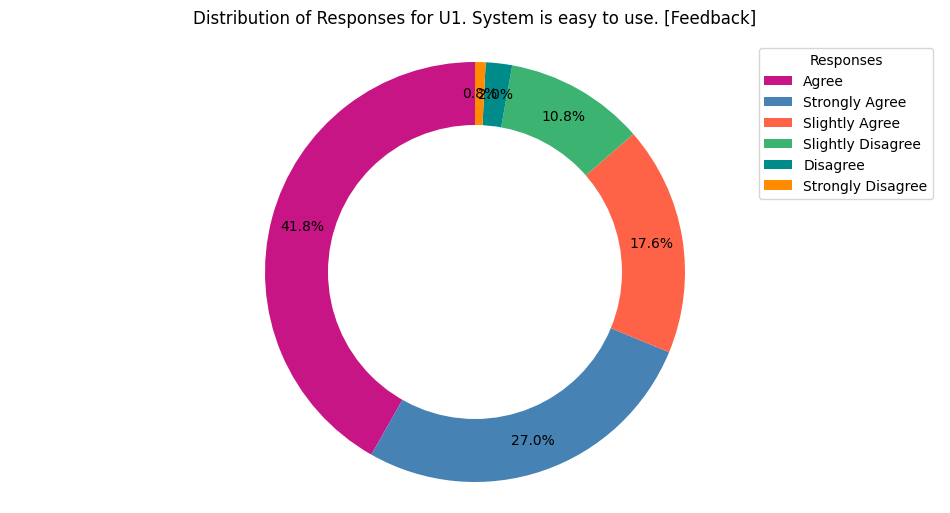

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[0]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

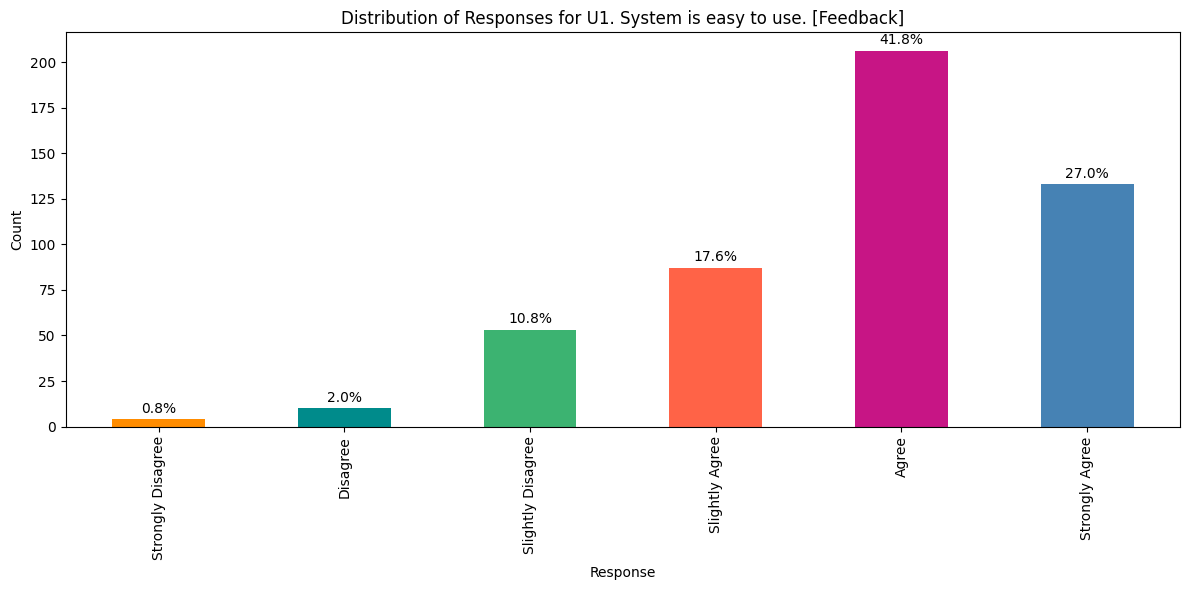

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

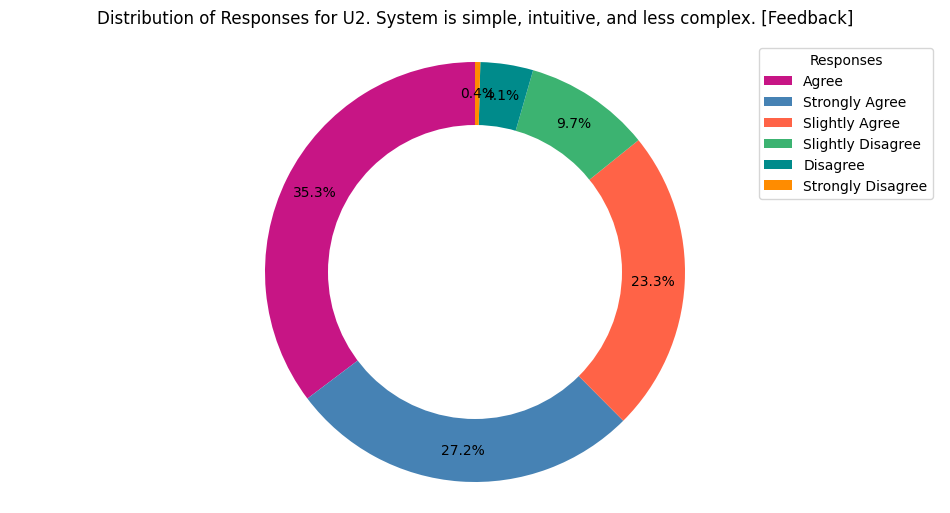

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[1]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

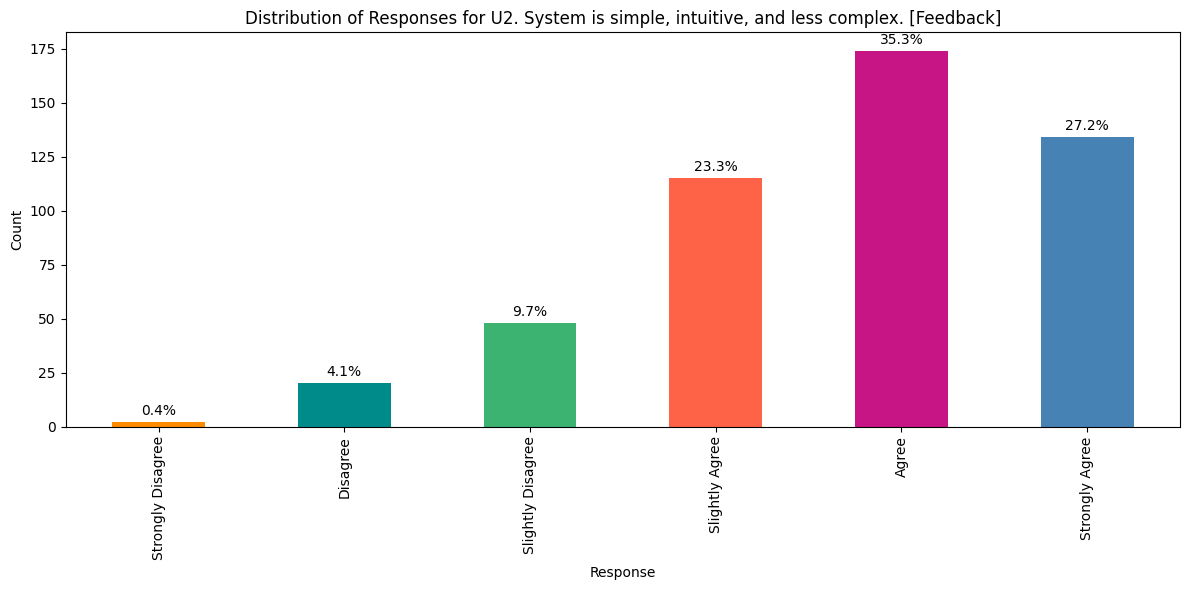

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

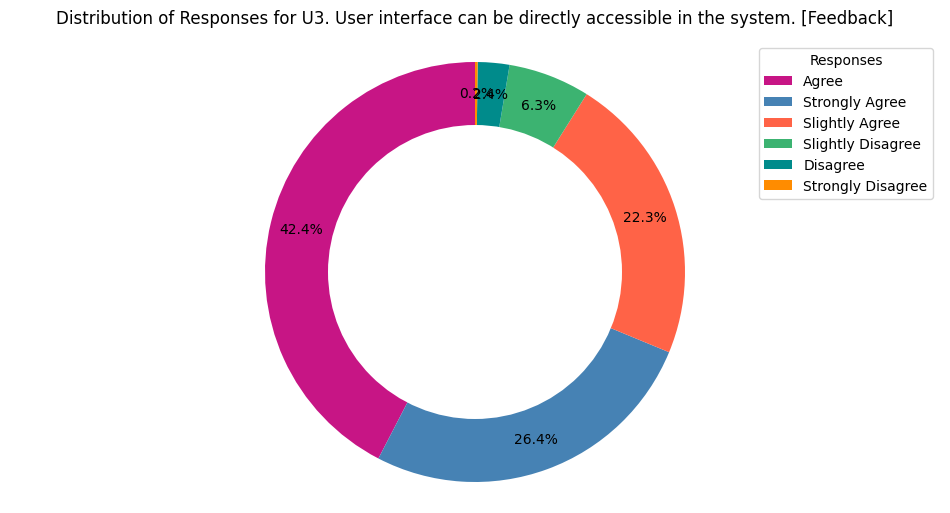

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[2]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

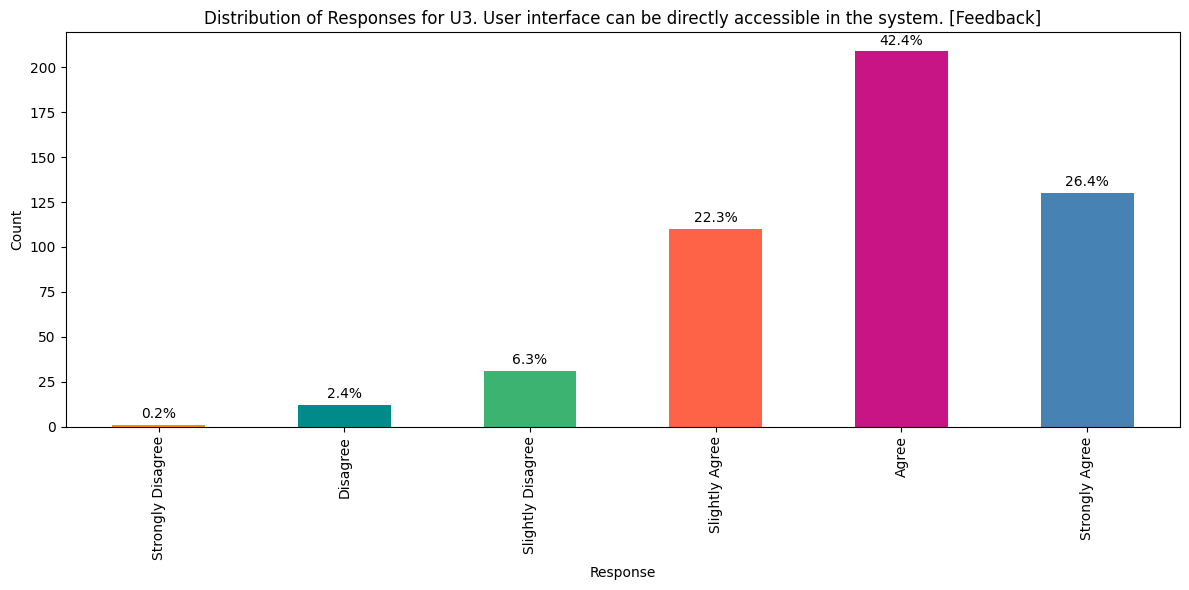

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

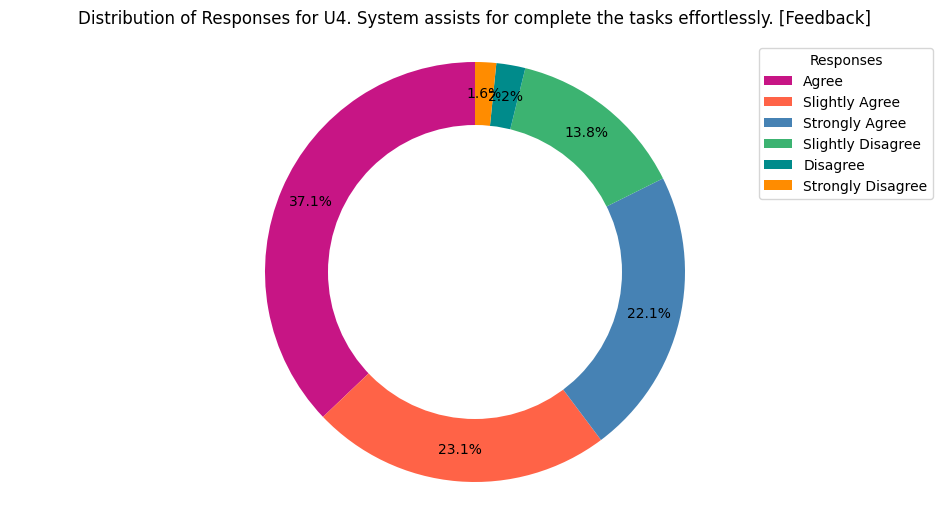

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[3]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

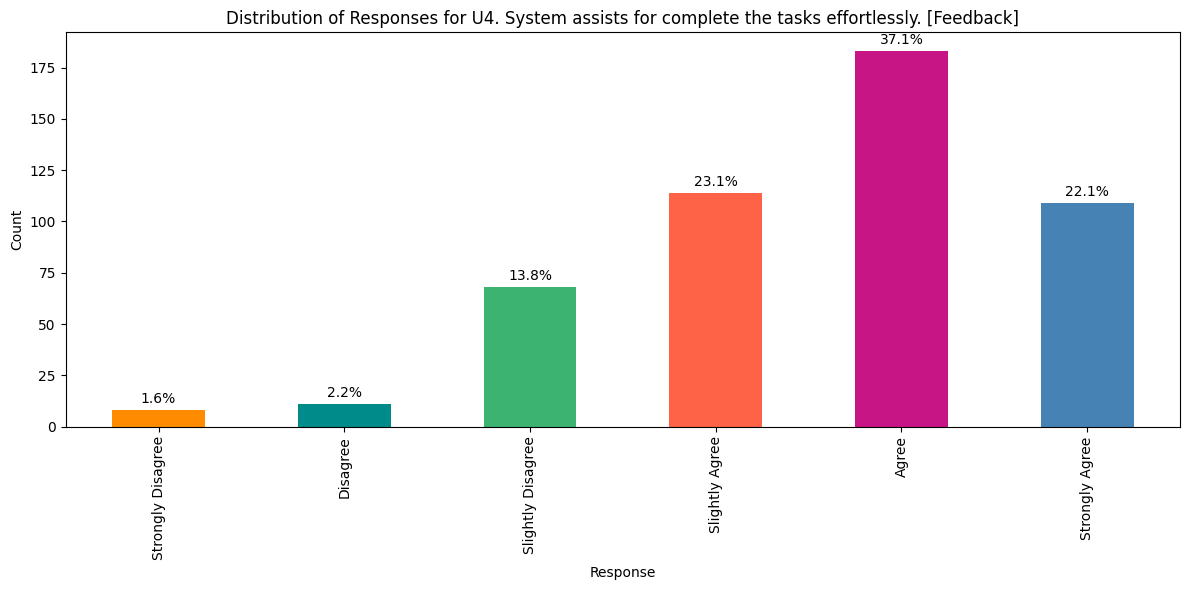

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

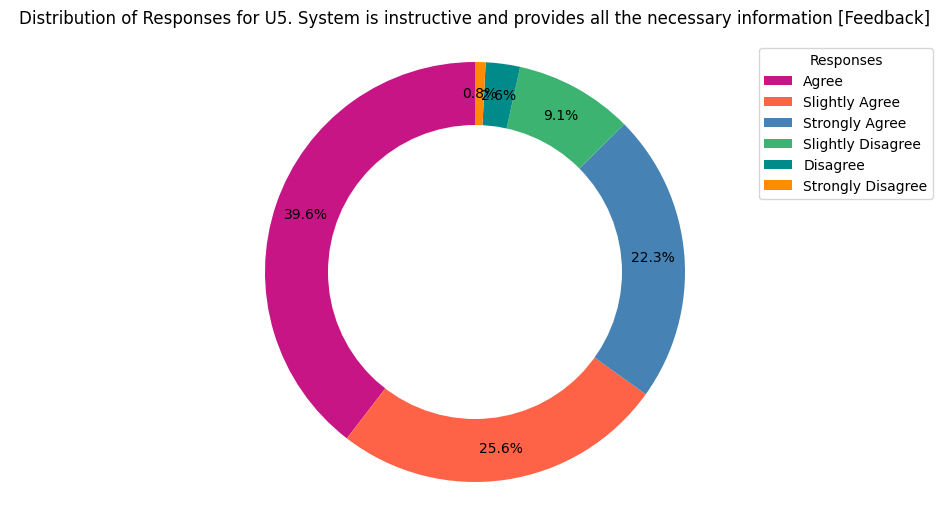

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[4]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

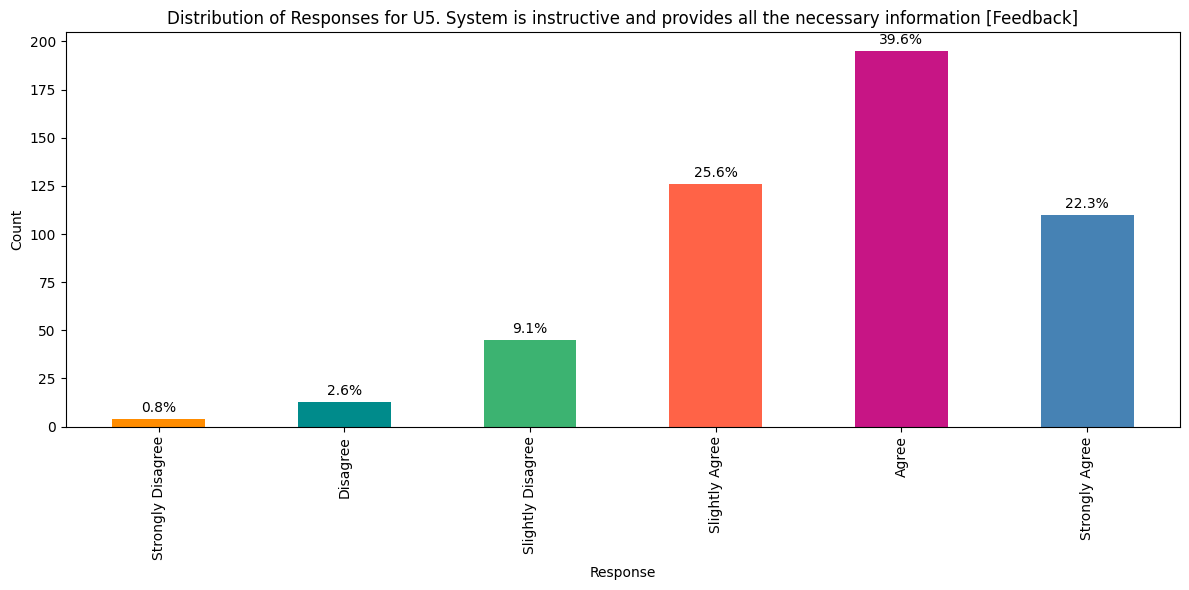

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

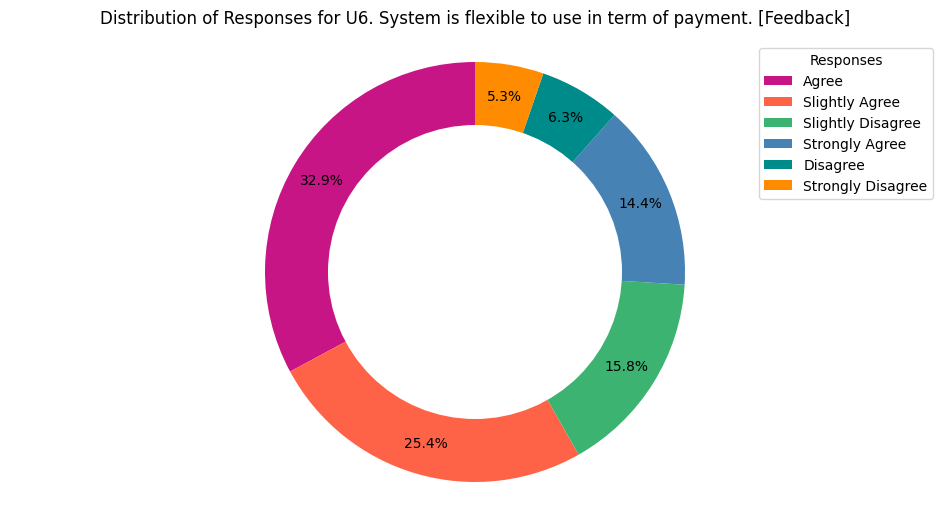

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[5]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

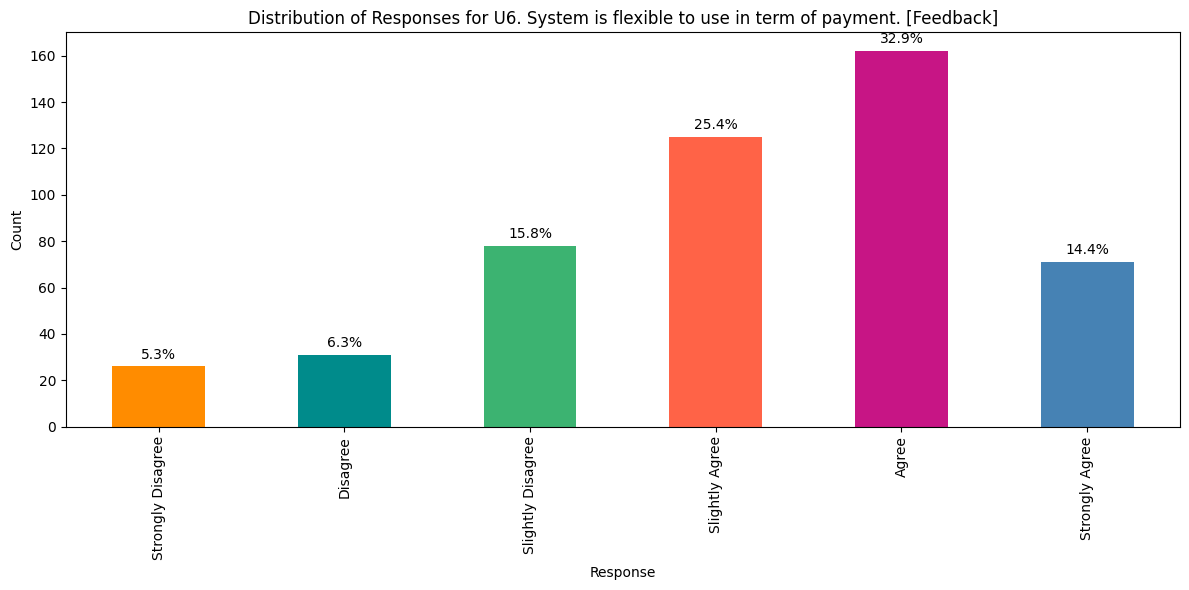

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

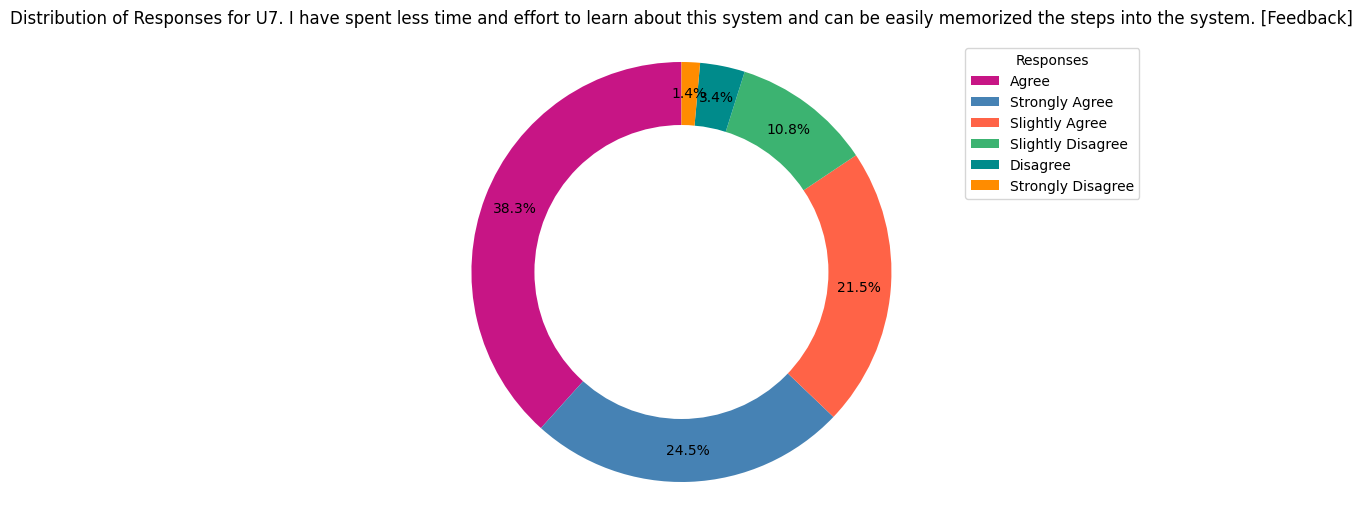

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[6]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

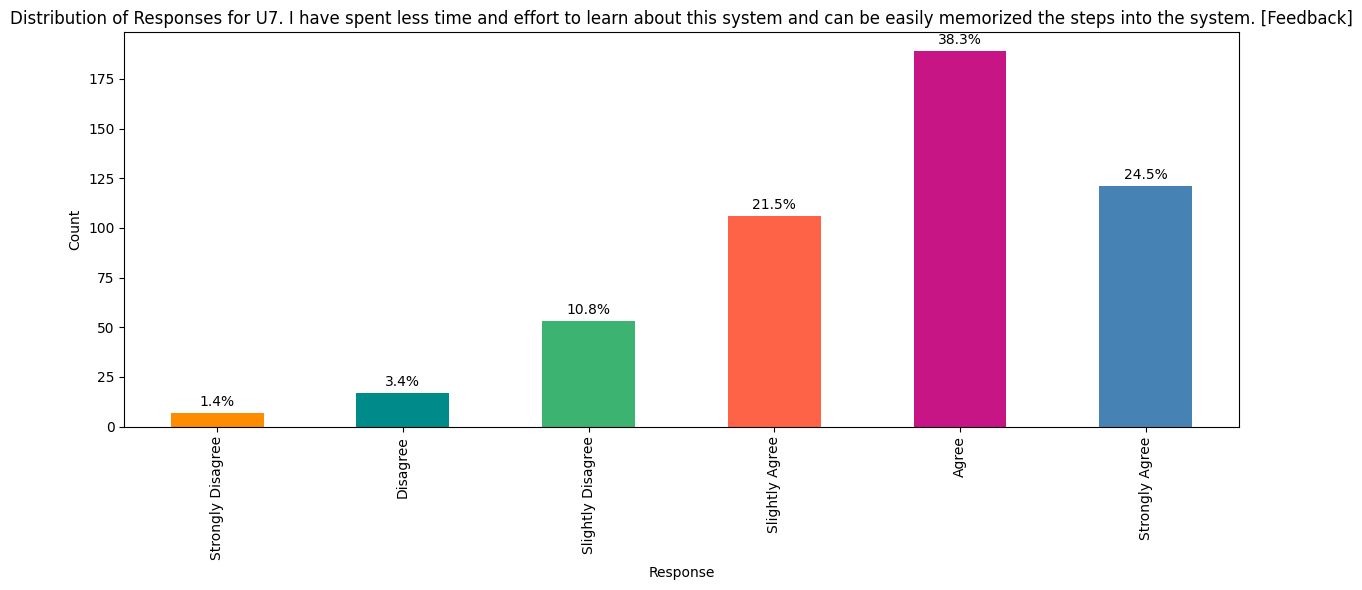

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

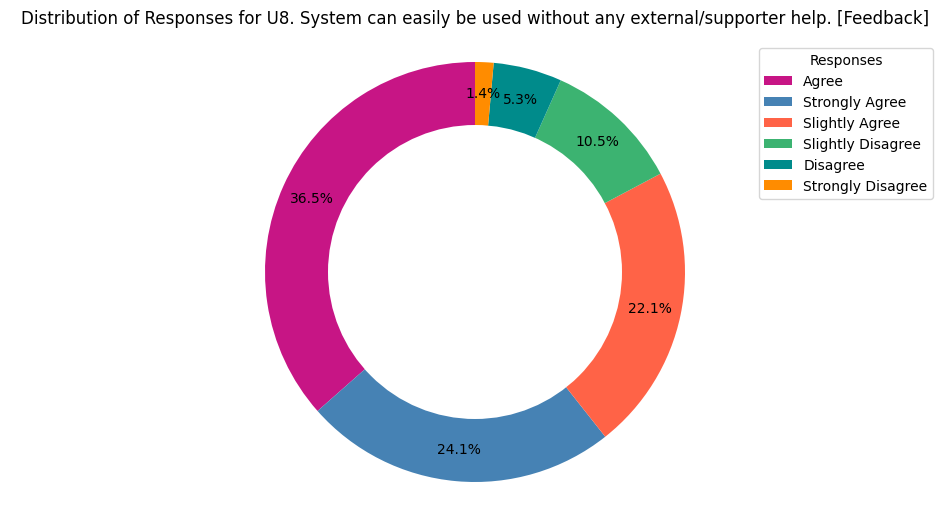

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = usability_columns[7]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

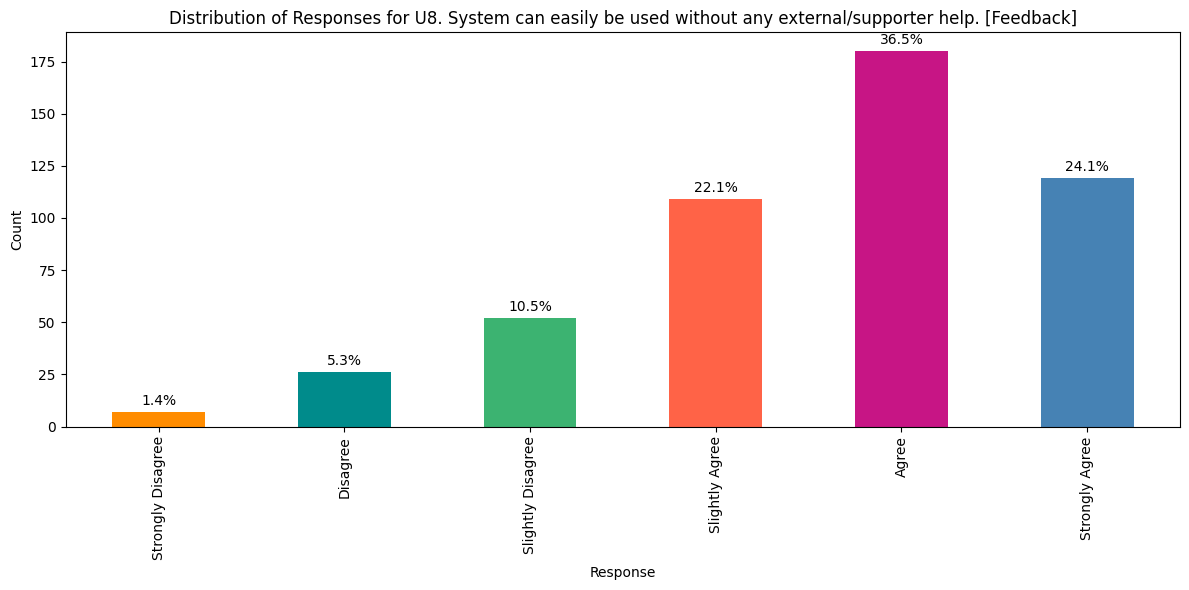

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Define marks for each response
marks_dict = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Slightly Disagree': 3,
    'Slightly Agree': 4,
    'Agree': 5,
    'Strongly Agree': 6
}

# Create columns for marks for each section
final_data['Usability Marks'] = final_data[usability_columns].applymap(lambda x: marks_dict.get(x, np.nan)).mean(axis=1)
final_data['User Affect Marks'] = final_data[user_affect_columns].applymap(lambda x: marks_dict.get(x, np.nan)).mean(axis=1)
final_data['User Value Marks'] = final_data[user_value_columns].applymap(lambda x: marks_dict.get(x, np.nan)).mean(axis=1)

# Display the average marks for each section
average_columns = ['Usability Marks', 'User Affect Marks', 'User Value Marks']
print(final_data[average_columns])


     Usability Marks  User Affect Marks  User Value Marks
0              4.500           5.000000          5.000000
1              6.000           6.000000          6.000000
2              4.875           5.714286          5.500000
3              5.125           5.857143          5.833333
4              5.625           5.857143          5.000000
..               ...                ...               ...
488            3.750           4.285714          3.166667
489            2.875           3.714286          3.333333
490            4.375           4.142857          3.666667
491            2.750           3.571429          3.500000
492            3.750           4.428571          4.000000

[493 rows x 3 columns]


<ipython-input-29-60a9da350b61>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Usability Marks'] = final_data[usability_columns].applymap(lambda x: marks_dict.get(x, np.nan)).mean(axis=1)
<ipython-input-29-60a9da350b61>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['User Affect Marks'] = final_data[user_affect_columns].applymap(lambda x: marks_dict.get(x, np.nan)).mean(axis=1)


In [ ]:
# Reverse the marks_dict to create a reverse mapping for response labels
reverse_marks_dict = {v: k for k, v in marks_dict.items()}

# Create columns for corresponding responses
final_data['Usability Response'] = final_data['Usability Marks'].round().map(reverse_marks_dict)
final_data['User Affect Response'] = final_data['User Affect Marks'].round().map(reverse_marks_dict)
final_data['User Value Response'] = final_data['User Value Marks'].round().map(reverse_marks_dict)

# Display the results
response_columns = ['Usability Response', 'User Affect Response', 'User Value Response']
print(final_data[response_columns])

    Usability Response User Affect Response User Value Response
0       Slightly Agree                Agree               Agree
1       Strongly Agree       Strongly Agree      Strongly Agree
2                Agree       Strongly Agree      Strongly Agree
3                Agree       Strongly Agree      Strongly Agree
4       Strongly Agree       Strongly Agree               Agree
..                 ...                  ...                 ...
488     Slightly Agree       Slightly Agree   Slightly Disagree
489  Slightly Disagree       Slightly Agree   Slightly Disagree
490     Slightly Agree       Slightly Agree      Slightly Agree
491  Slightly Disagree       Slightly Agree      Slightly Agree
492     Slightly Agree       Slightly Agree      Slightly Agree

[493 rows x 3 columns]


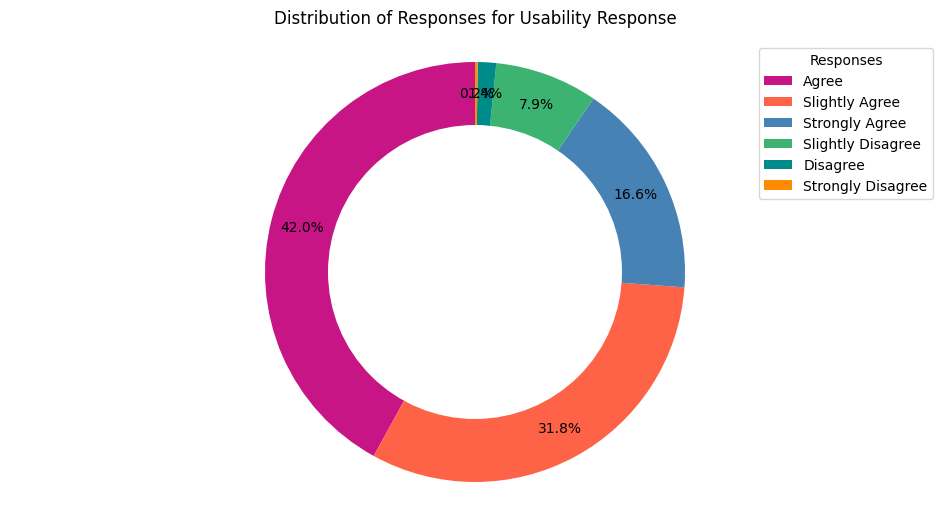

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = response_columns[0]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

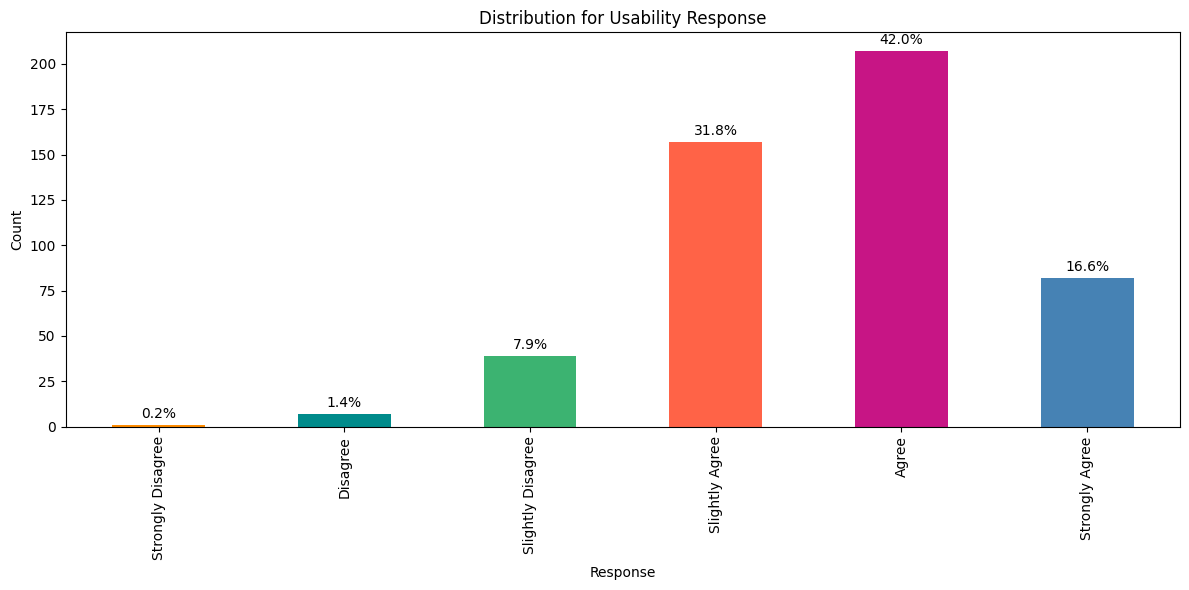

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

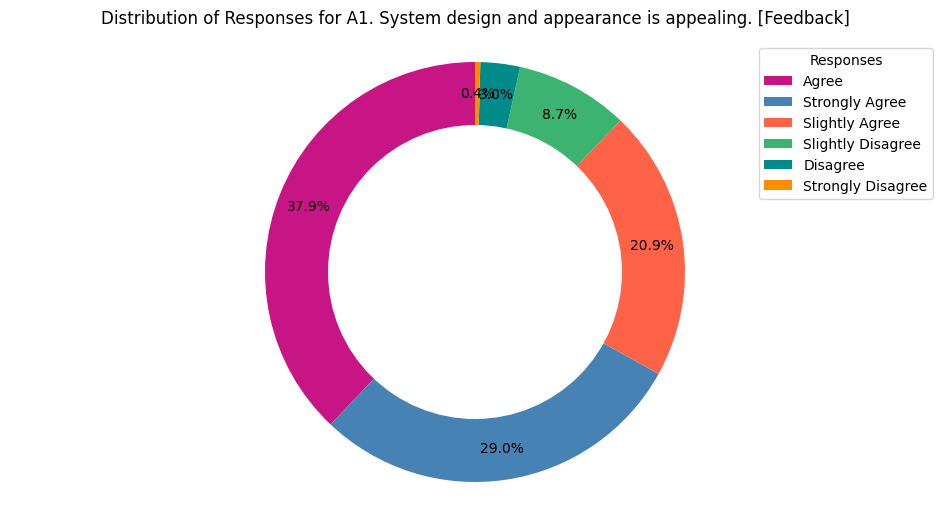

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[0]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

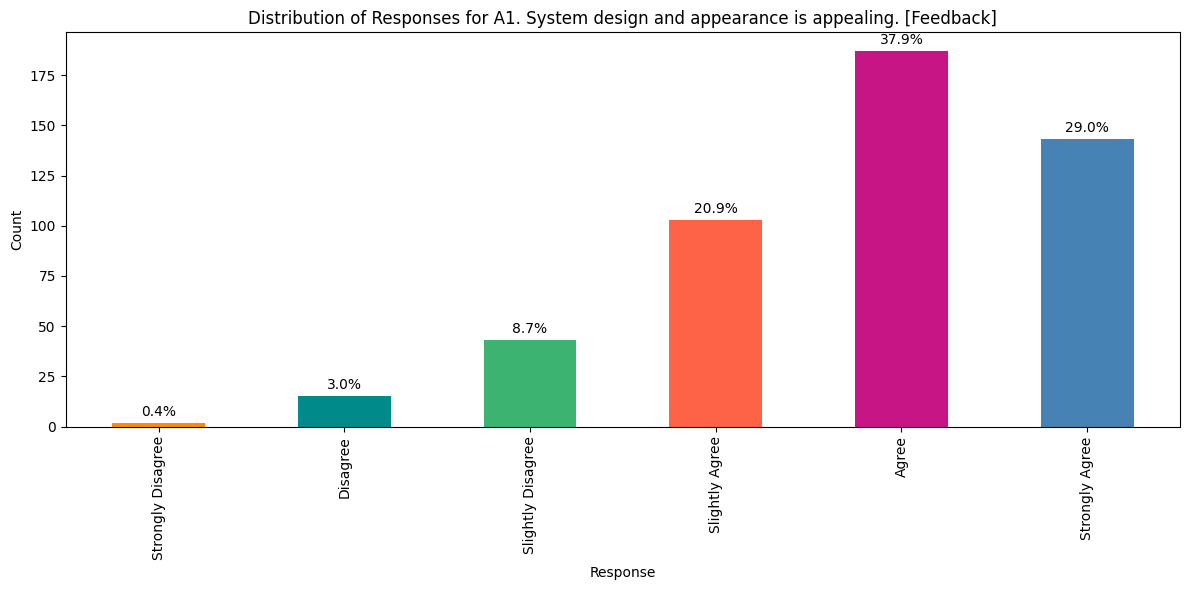

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

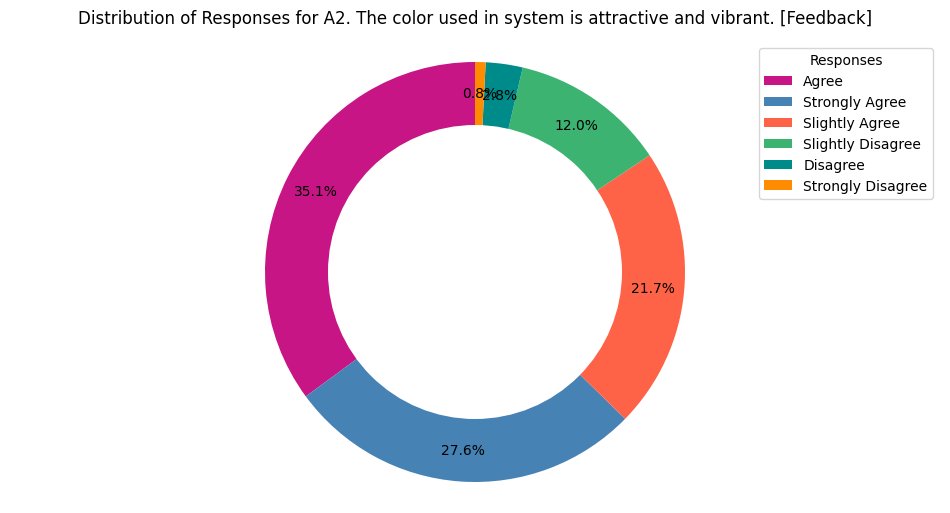

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[1]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

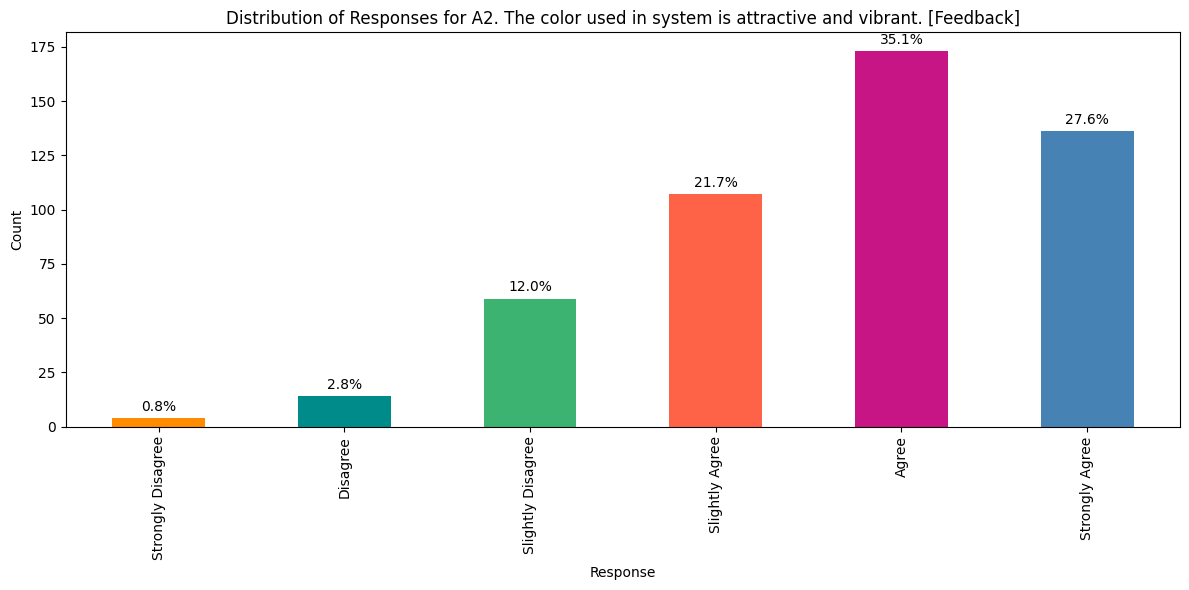

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

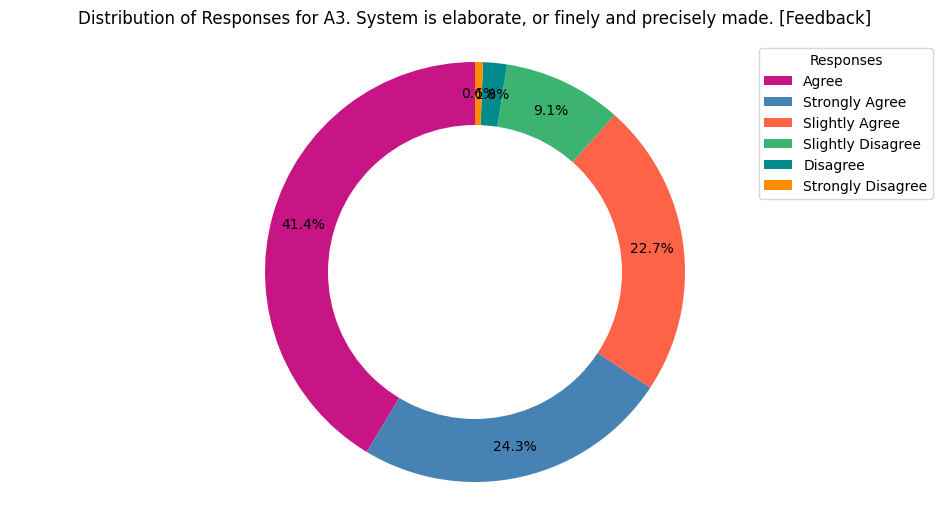

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[2]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

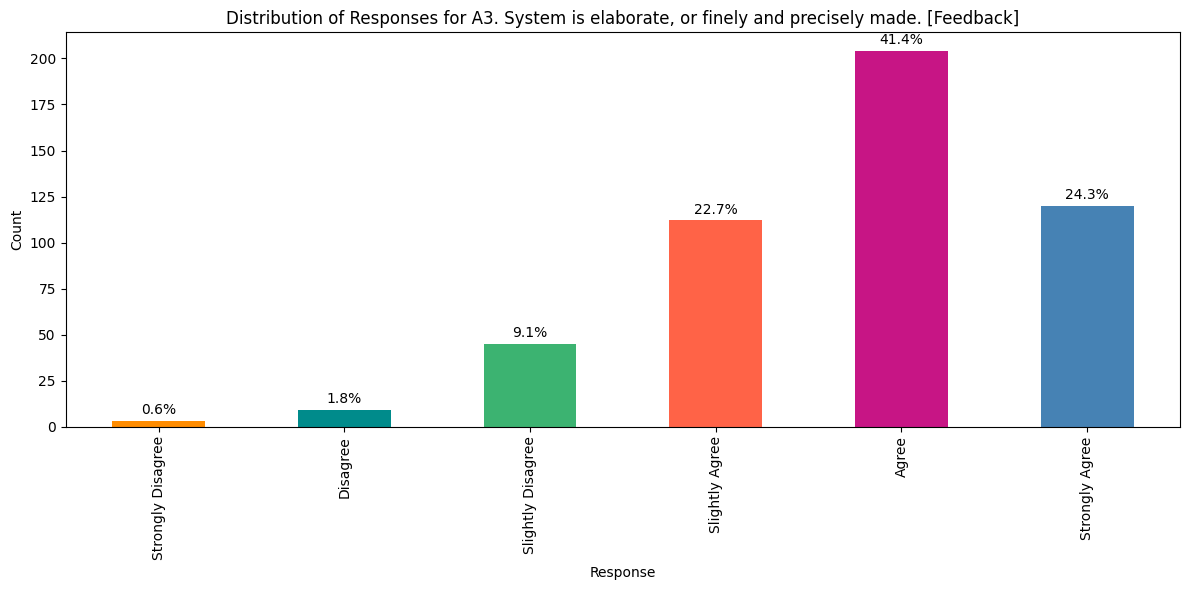

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

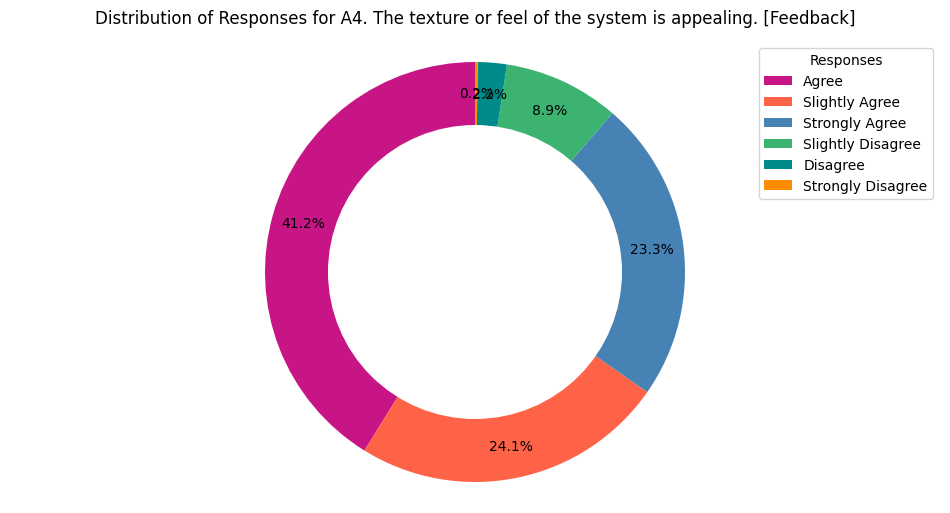

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[3]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

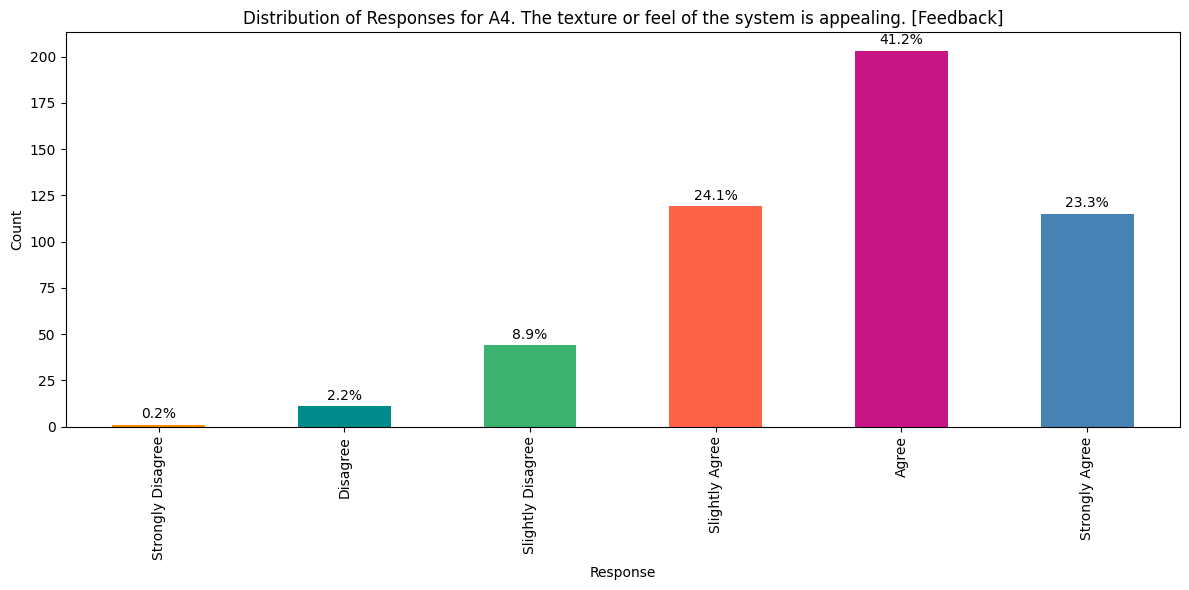

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

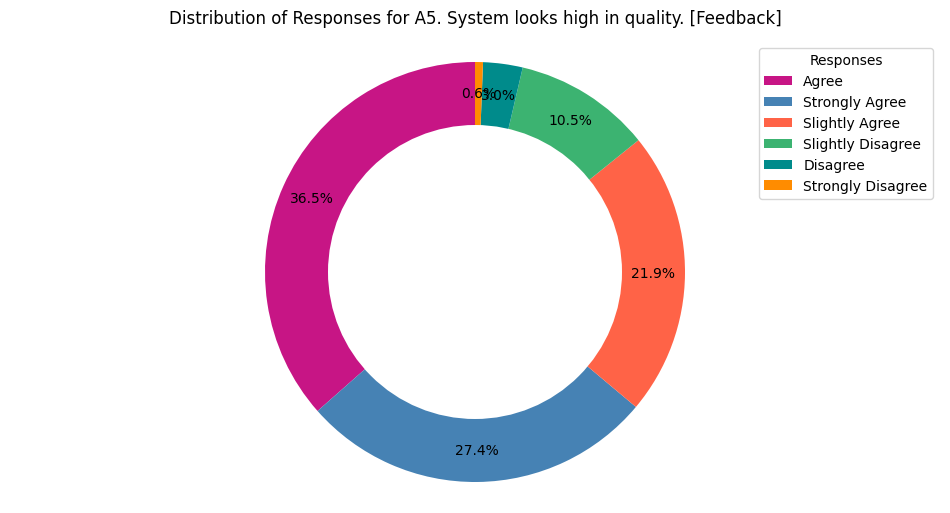

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[4]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

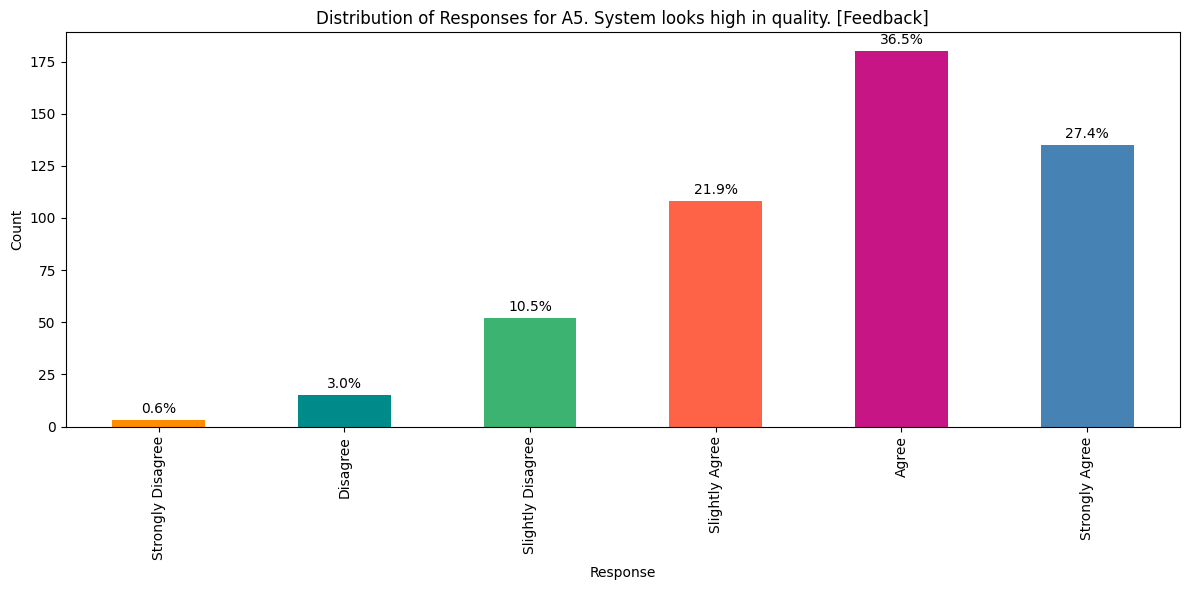

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

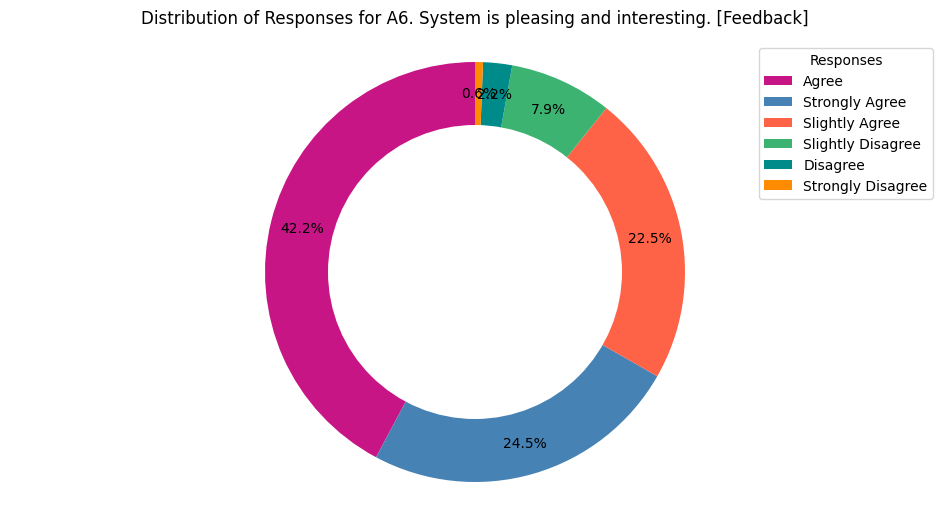

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[5]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

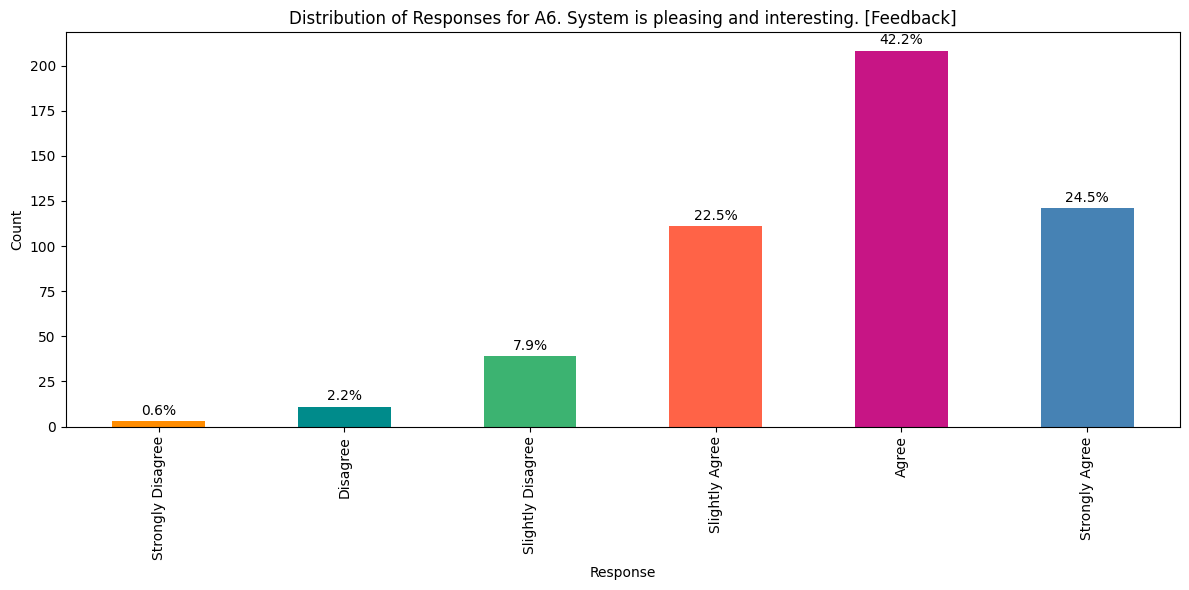

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

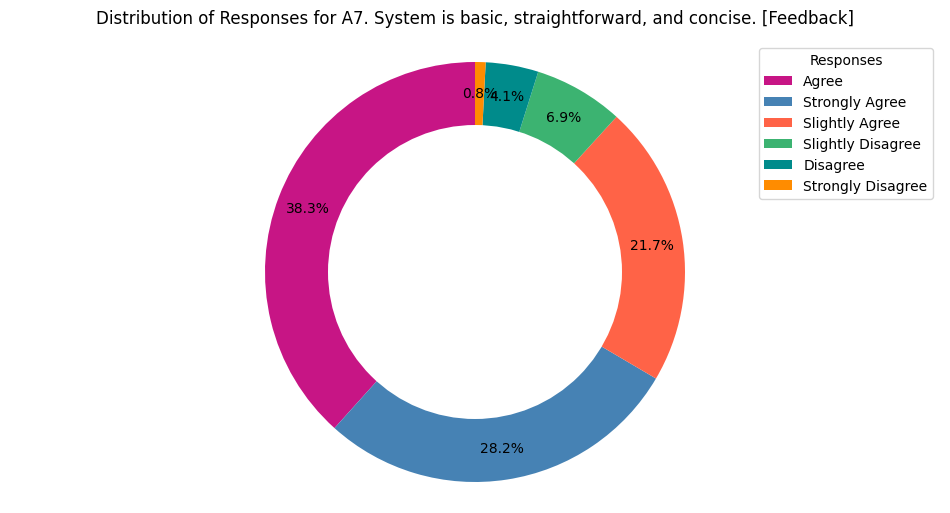

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_affect_columns[6]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

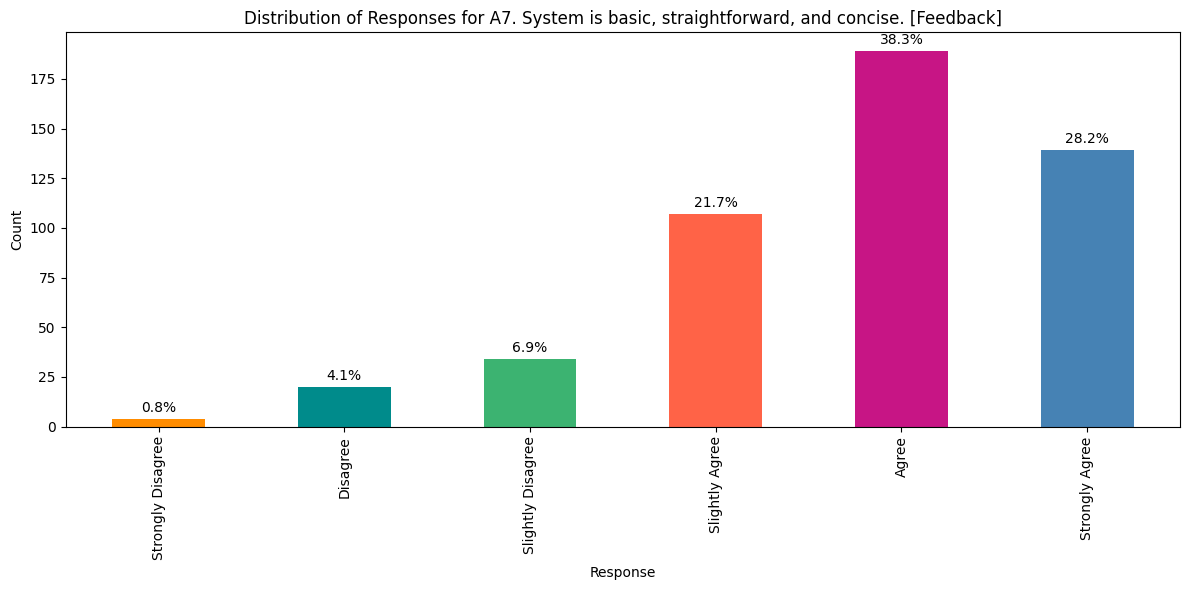

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

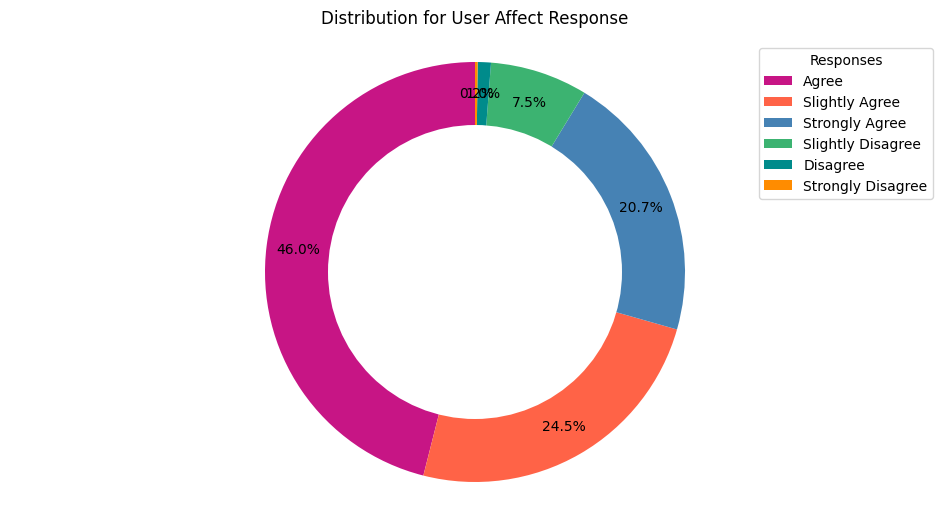

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = response_columns[1]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

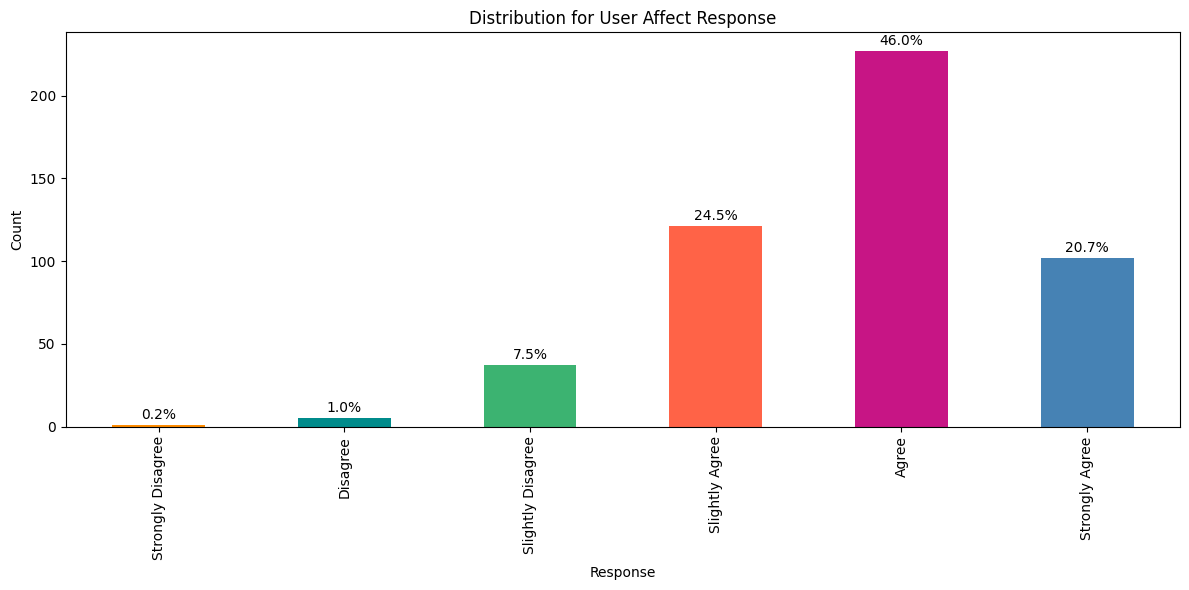

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

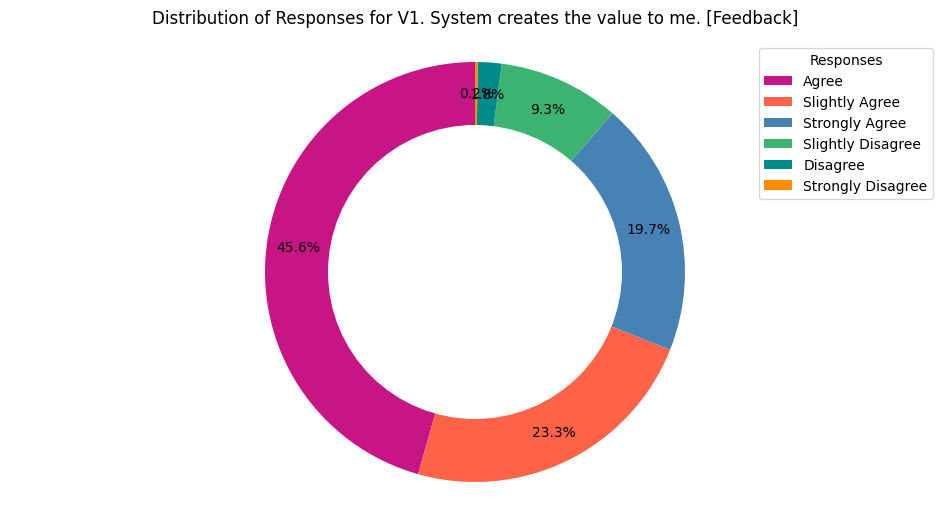

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[0]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

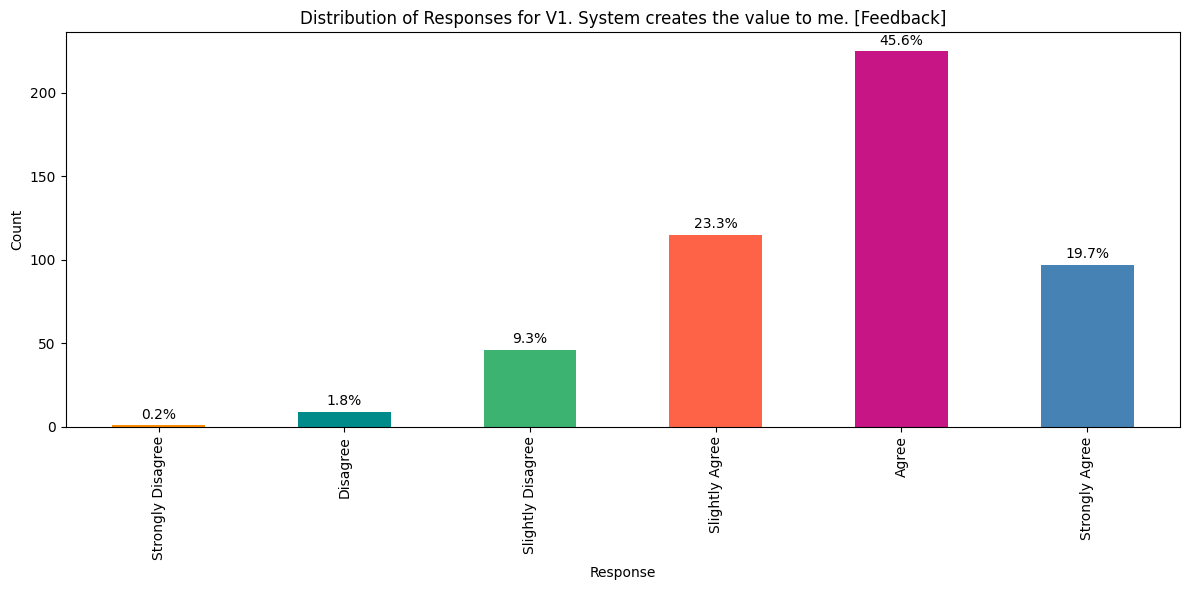

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

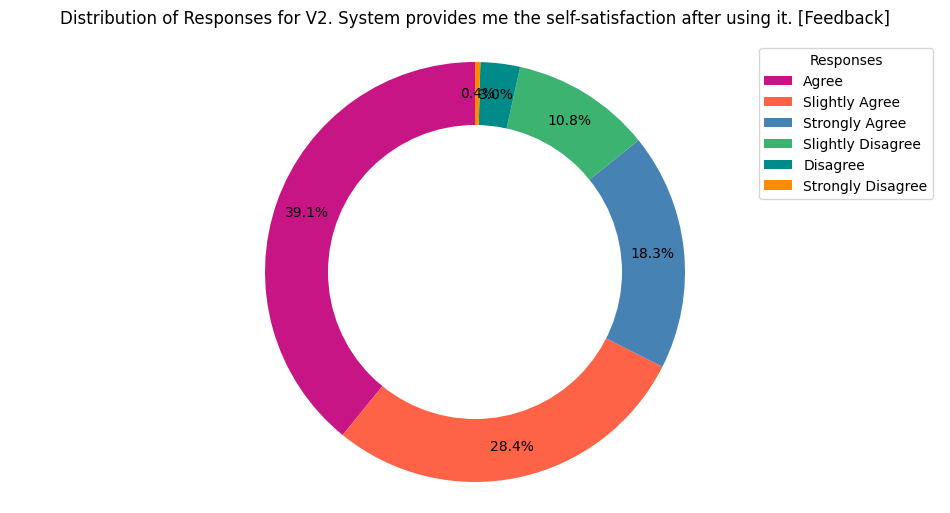

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[1]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

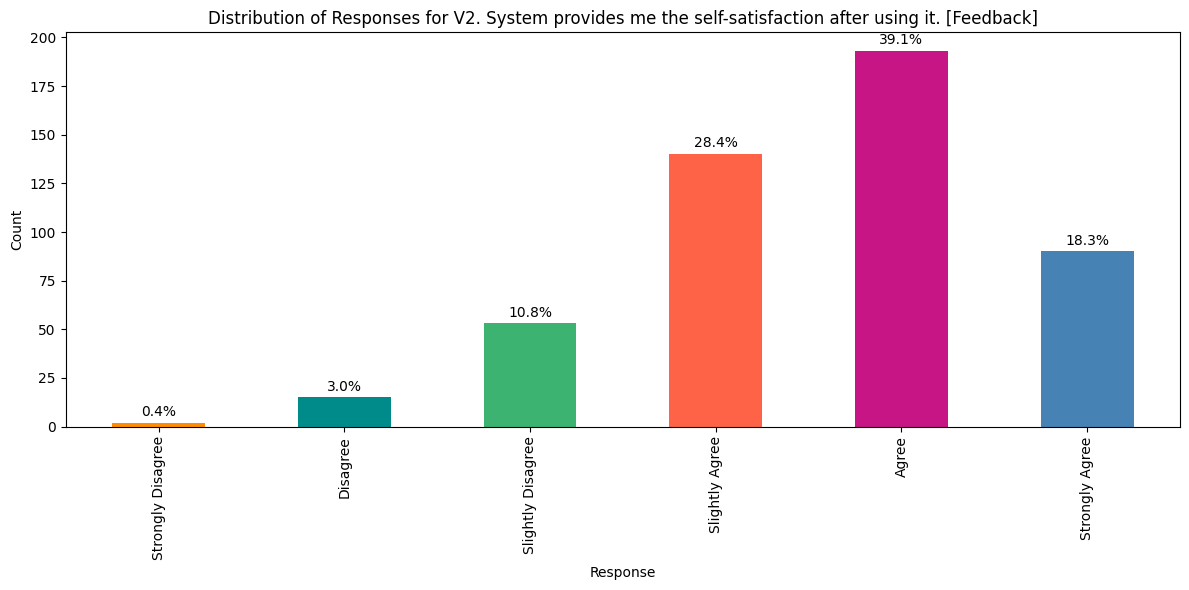

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

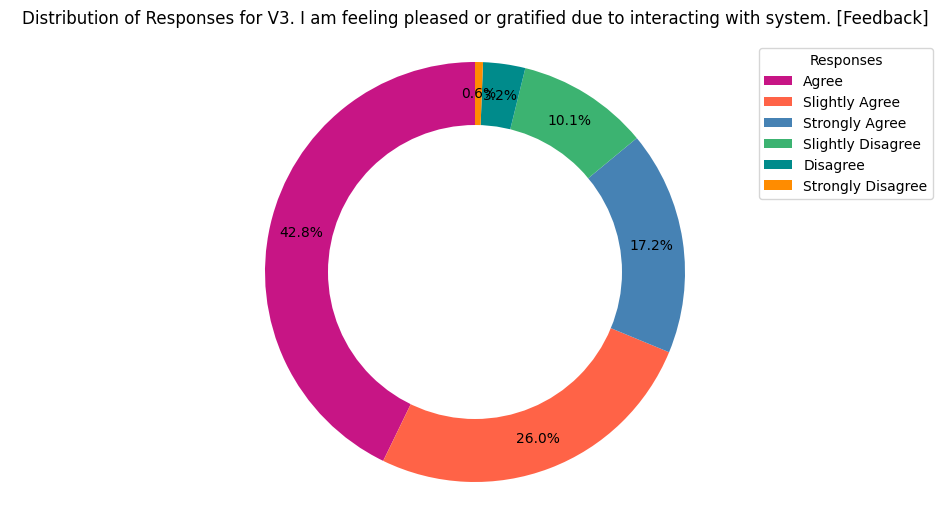

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[2]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

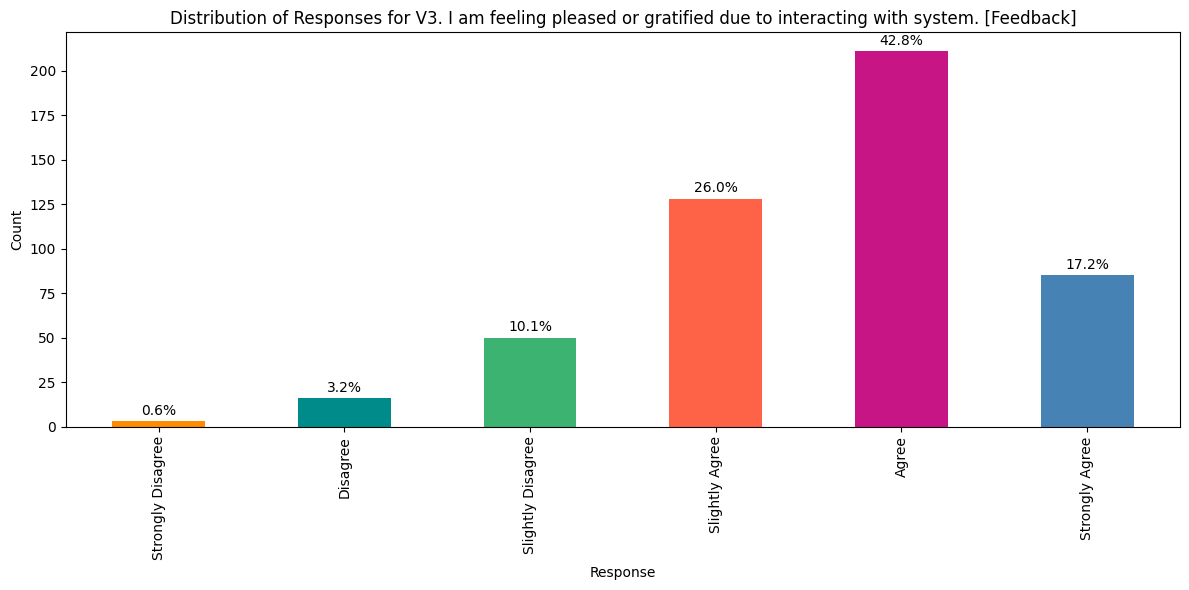

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

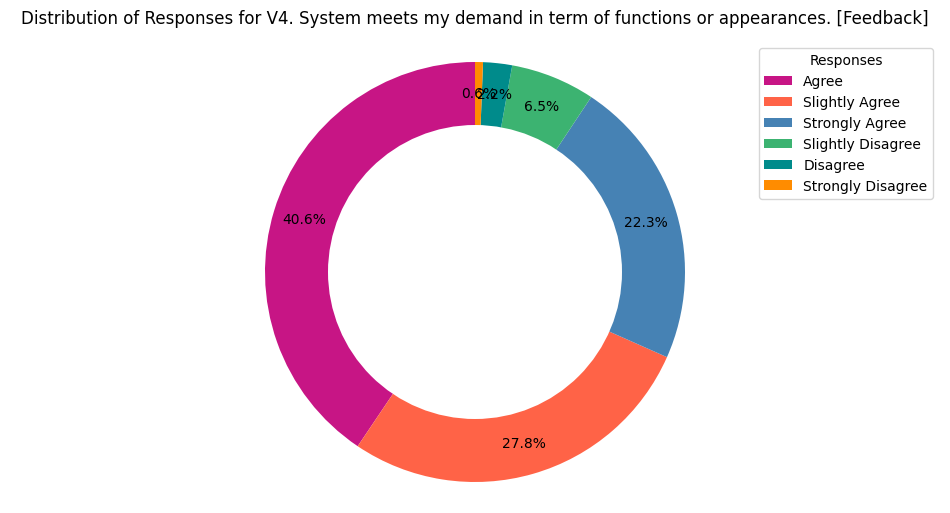

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[3]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

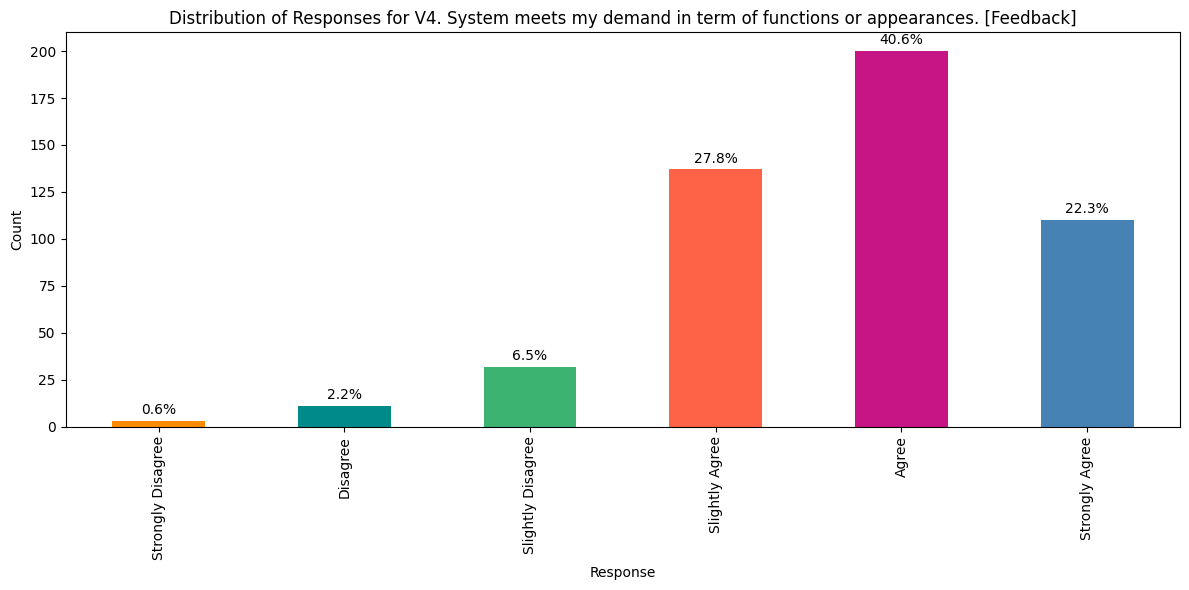

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

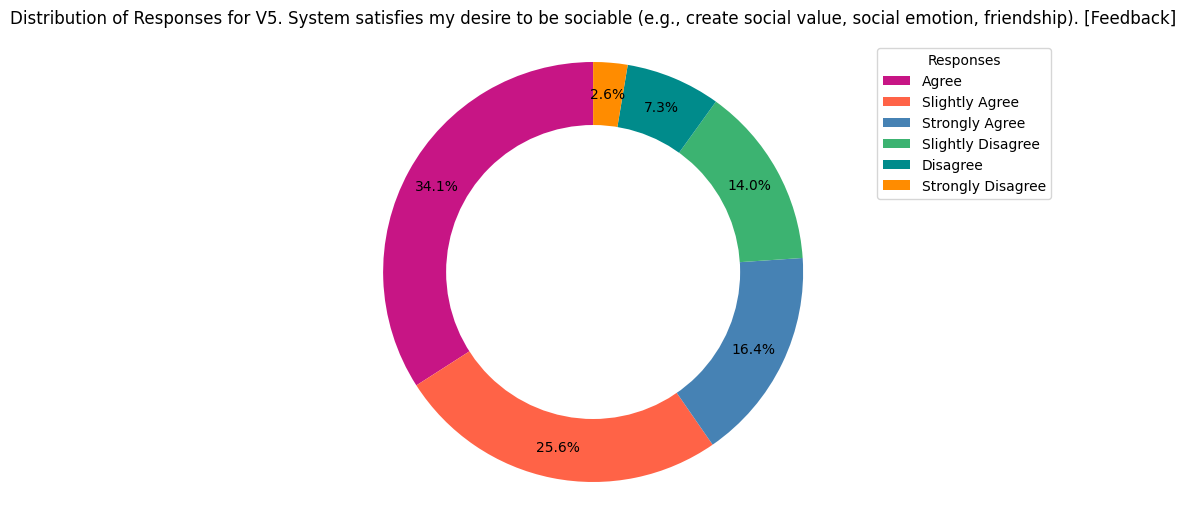

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[4]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

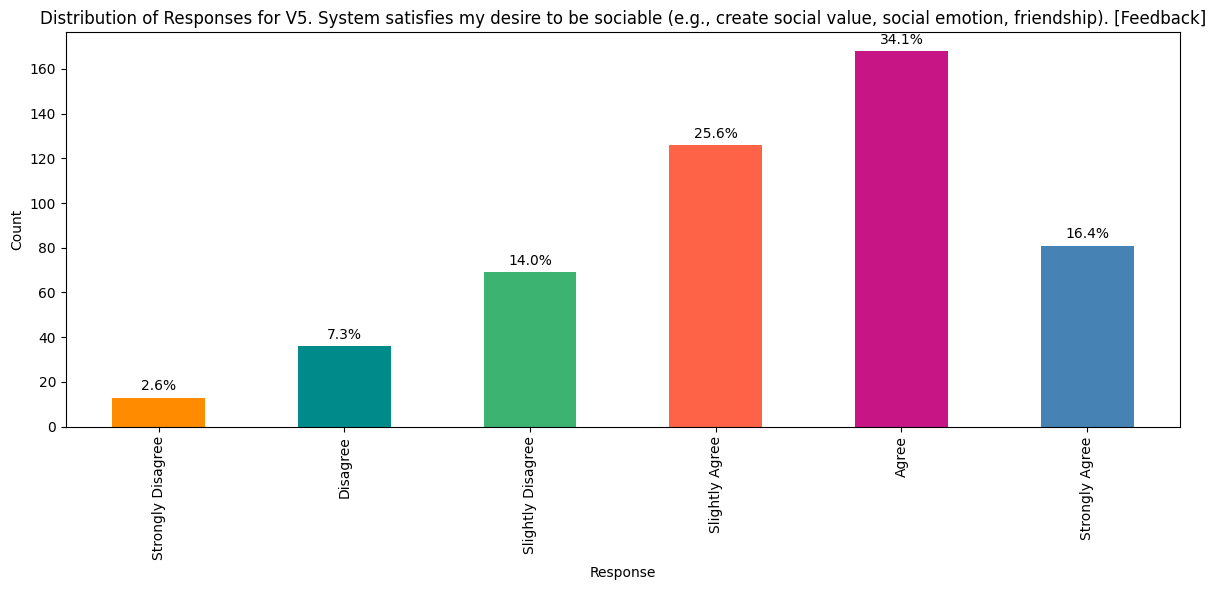

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

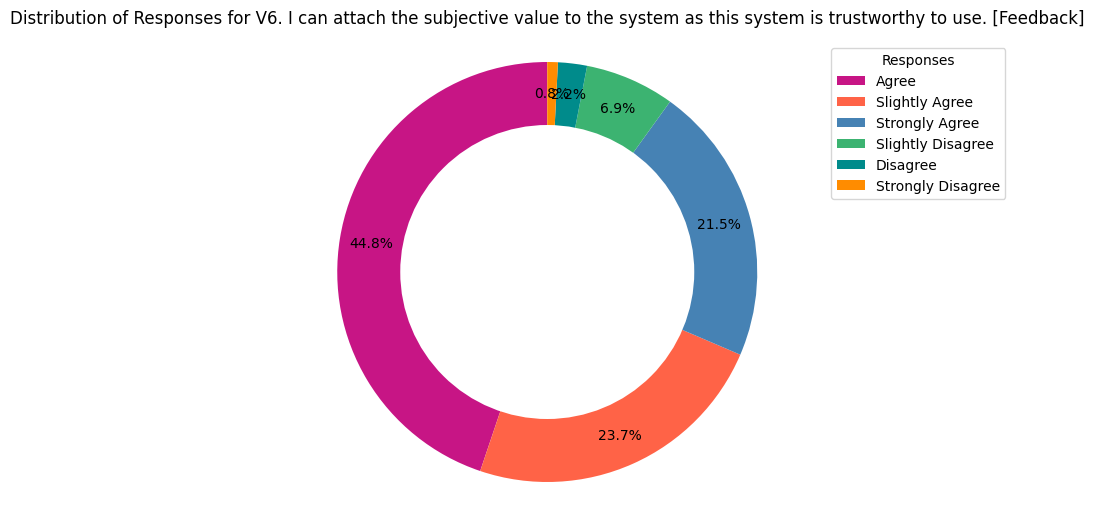

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = user_value_columns[5]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

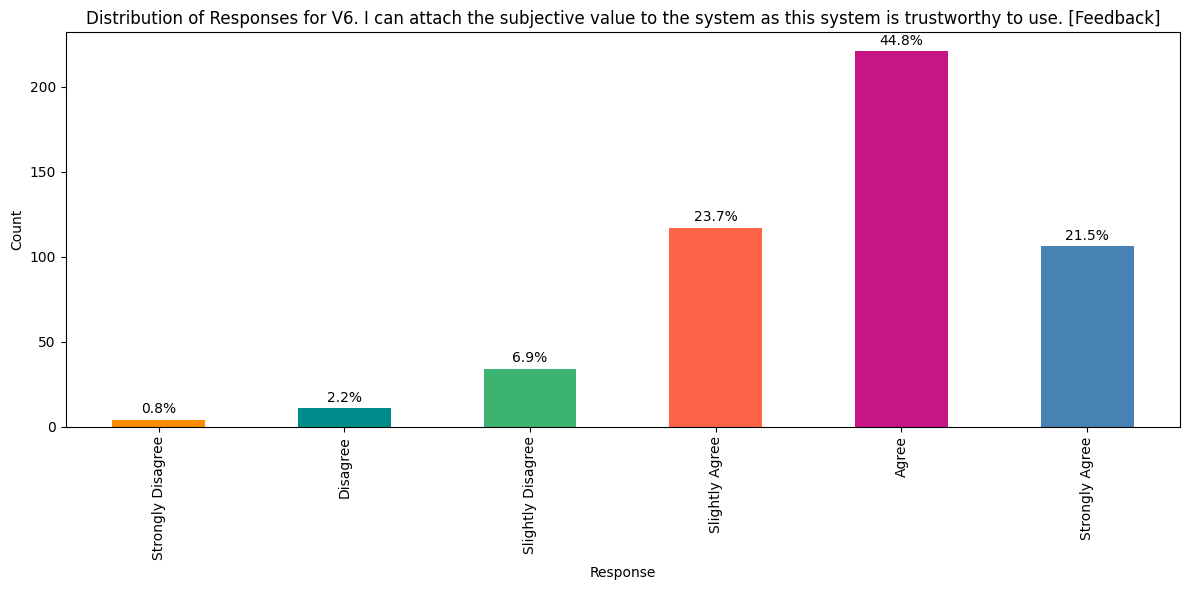

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution of Responses for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

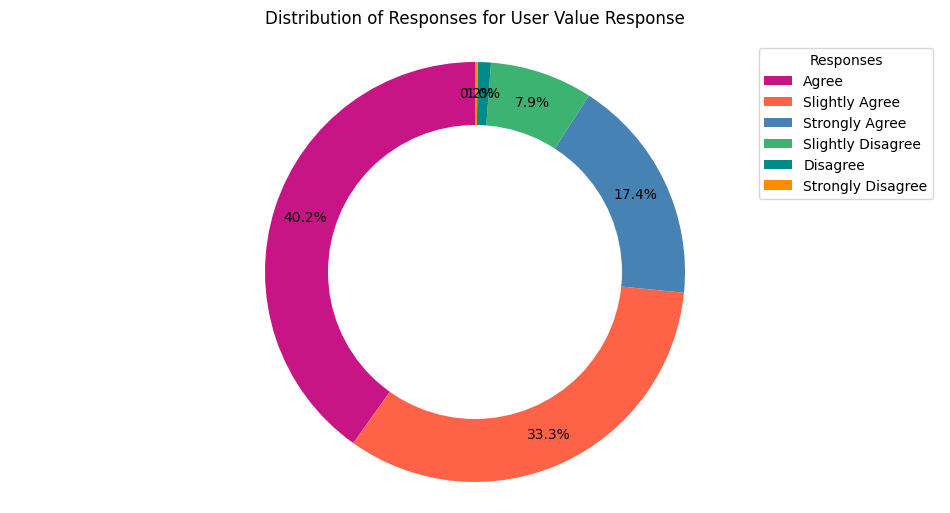

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Usability Question 1
question_column = response_columns[2]

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting a pie chart for the distribution of responses
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the pie chart with consistent colors
wedges, texts, autotexts = plt.pie(response_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4), colors=[colors_dict[x] for x in response_counts.index])

# Draw a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title and legend
plt.title(f'Distribution of Responses for {question_column}', y=1.02)  # Adjust title position
legend_labels = [f'{label}' for label in response_counts.index]
plt.legend(title='Responses', labels=legend_labels, loc='upper right', bbox_to_anchor=(1, 1))

# Display the pie chart
plt.show()

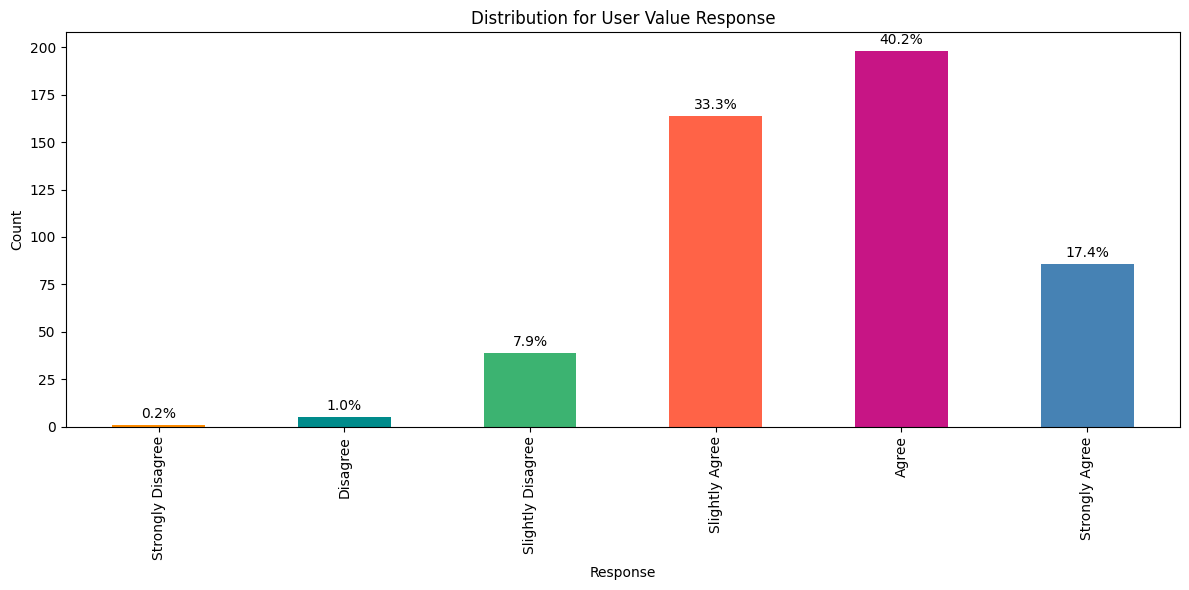

In [ ]:
# Plotting a bar chart next to the pie chart
plt.figure(figsize=(12, 6))  # Set the figure size for the bar chart

# Bar chart with consistent colors
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying pie chart percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100  # Calculate the percentage
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution for {question_column}')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 28 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   U1. System is easy to use. [Feedback]                                                                                               493 non-null    object 
 1   U2. System is simple, intuitive, and less complex. [Feedback]                                                                       493 non-null    object 
 2   U3. User interface can be directly accessible in the system. [Feedback]                                                             493 non-null    object 
 3   U4. System assists for complete the tasks effortlessly. [Feedback]                   

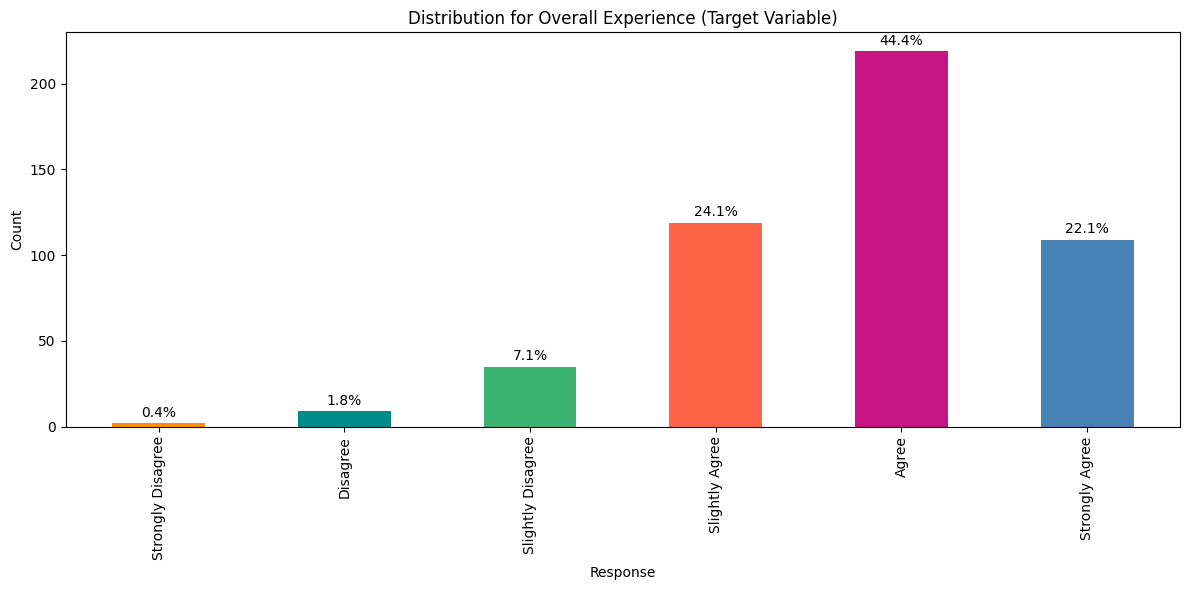

In [ ]:
import matplotlib.pyplot as plt

# Overall Experience Question
question_column = 'My overall experience about the system is excellent. [Feedback]'

# Filter data for the question
question_data = final_data[[question_column]]

# Count the occurrences of each response
response_counts = question_data[question_column].value_counts()

# Define the order of categories
order = ['Strongly Disagree', 'Disagree', 'Slightly Disagree', 'Slightly Agree', 'Agree', 'Strongly Agree']

# Define colors for each category
colors_dict = {
    'Strongly Disagree': 'darkorange',
    'Disagree': 'darkcyan',
    'Slightly Disagree': 'mediumseagreen',
    'Slightly Agree': 'tomato',
    'Agree': 'mediumvioletred',
    'Strongly Agree': 'steelblue'
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))
question_data[question_column].value_counts().loc[order].plot(kind='bar', color=[colors_dict[x] for x in order])

# Displaying percentages on top of each bar
for i, count in enumerate(question_data[question_column].value_counts().loc[order]):
    percentage = count / question_data.shape[0] * 100
    plt.text(i, count + 2, f'{percentage:.1f}%', ha='center', va='bottom')

# Set the title and labels
plt.title(f'Distribution for Overall Experience (Target Variable)')
plt.xlabel('Response')
plt.ylabel('Count')

# Show the bar chart
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Set the target column
target_column = 'My overall experience about the system is excellent. [Feedback]'

# Define features for each scenario
features_all_questions = final_data.iloc[:, 0:21]
features_average_marks = final_data.iloc[:, 23:26]
features_usability = final_data[usability_columns]
features_user_affect = final_data[user_affect_columns]
features_user_value = final_data[user_value_columns]

# Define labels
labels = final_data[target_column]

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Function to evaluate models
def evaluate_model_scaling(model, features_train, features_test, labels_train, labels_test):
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)

    model.fit(features_train_scaled, labels_train)
    predictions = model.predict(features_test_scaled)
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

# Function to evaluate models for a sparse matrix
def evaluate_model_scaling_sparse(model, features_train, features_test, labels_train, labels_test):
    model.fit(features_train, labels_train)
    predictions = model.predict(features_test)
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

# Function to split data, apply one-hot encoding, and evaluate models for a given scenario
def evaluate_scenario(features, scenario_name):
    print(f"\nScenario: {scenario_name}")

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.3, random_state=42)

    # Evaluate models, considering sparse matrices
    for model_name, model in models.items():
        if isinstance(features_encoded, csr_matrix):
            accuracy = evaluate_model_scaling_sparse(model, features_train, features_test, labels_train, labels_test)
        else:
            accuracy = evaluate_model_scaling(model, features_train, features_test, labels_train, labels_test)
        print(f"{model_name}: Accuracy - {accuracy:.4f}")


# Evaluate models for each scenario
evaluate_scenario(features_all_questions, "All Questions")
evaluate_scenario(features_average_marks, "Average Marks Columns")
evaluate_scenario(features_usability, "Usability Columns")
evaluate_scenario(features_user_affect, "User Affect Columns")
evaluate_scenario(features_user_value, "User Value Columns")



Scenario: All Questions
Logistic Regression: Accuracy - 0.6014
Decision Tree: Accuracy - 0.5270
Random Forest: Accuracy - 0.6284
Support Vector Machine: Accuracy - 0.6284
k-Nearest Neighbors: Accuracy - 0.6351

Scenario: Average Marks Columns
Logistic Regression: Accuracy - 0.6351
Decision Tree: Accuracy - 0.5608
Random Forest: Accuracy - 0.5878
Support Vector Machine: Accuracy - 0.6081
k-Nearest Neighbors: Accuracy - 0.6284

Scenario: Usability Columns
Logistic Regression: Accuracy - 0.5743
Decision Tree: Accuracy - 0.4797
Random Forest: Accuracy - 0.5473
Support Vector Machine: Accuracy - 0.5946
k-Nearest Neighbors: Accuracy - 0.5608

Scenario: User Affect Columns
Logistic Regression: Accuracy - 0.5743
Decision Tree: Accuracy - 0.5473
Random Forest: Accuracy - 0.5811
Support Vector Machine: Accuracy - 0.5878
k-Nearest Neighbors: Accuracy - 0.5946

Scenario: User Value Columns
Logistic Regression: Accuracy - 0.6216
Decision Tree: Accuracy - 0.6149
Random Forest: Accuracy - 0.6486
Sup

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Set the target column
target_column = 'My overall experience about the system is excellent. [Feedback]'

# Define features for each scenario
features_all_questions = final_data.iloc[:, 0:21]
features_average_marks = final_data.iloc[:, 23:26]
features_usability = final_data[usability_columns]
features_user_affect = final_data[user_affect_columns]
features_user_value = final_data[user_value_columns]

# Define labels
labels = final_data[target_column]

# Define classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

# Function to evaluate models
def evaluate_model_scaling(model, features_train, features_test, labels_train, labels_test):
    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)

    model.fit(features_train_scaled, labels_train)
    predictions = model.predict(features_test_scaled)
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

# Function to evaluate models for a sparse matrix
def evaluate_model_scaling_sparse(model, features_train, features_test, labels_train, labels_test):
    model.fit(features_train.toarray(), labels_train)
    predictions = model.predict(features_test.toarray())
    accuracy = accuracy_score(labels_test, predictions)
    return accuracy

# Function to split data, apply one-hot encoding, and evaluate models for a given scenario
def evaluate_scenario(features, scenario_name):
    print(f"\nScenario: {scenario_name}")

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.1, random_state=42)

    # Evaluate models, considering sparse matrices
    for model_name, model in models.items():
        if isinstance(features_encoded, csr_matrix):
            accuracy = evaluate_model_scaling_sparse(model, features_train, features_test, labels_train, labels_test)
        else:
            accuracy = evaluate_model_scaling(model, features_train, features_test, labels_train, labels_test)
        print(f"{model_name}: Accuracy - {accuracy:.4f}")

# Evaluate models for each scenario
evaluate_scenario(features_all_questions, "All Questions")
evaluate_scenario(features_average_marks, "Average Marks Columns")
evaluate_scenario(features_usability, "Usability Columns")
evaluate_scenario(features_user_affect, "User Affect Columns")
evaluate_scenario(features_user_value, "User Value Columns")



Scenario: All Questions
Logistic Regression: Accuracy - 0.6600
Decision Tree: Accuracy - 0.5200
Random Forest: Accuracy - 0.7000
Support Vector Machine: Accuracy - 0.7200
k-Nearest Neighbors: Accuracy - 0.6200
Neural Network: Accuracy - 0.5400
Naive Bayes: Accuracy - 0.2200

Scenario: Average Marks Columns
Logistic Regression: Accuracy - 0.7200
Decision Tree: Accuracy - 0.6400
Random Forest: Accuracy - 0.6600
Support Vector Machine: Accuracy - 0.7200
k-Nearest Neighbors: Accuracy - 0.7600
Neural Network: Accuracy - 0.7000
Naive Bayes: Accuracy - 0.2000

Scenario: Usability Columns
Logistic Regression: Accuracy - 0.6000
Decision Tree: Accuracy - 0.4000
Random Forest: Accuracy - 0.5000
Support Vector Machine: Accuracy - 0.6000
k-Nearest Neighbors: Accuracy - 0.5400
Neural Network: Accuracy - 0.3600
Naive Bayes: Accuracy - 0.1800

Scenario: User Affect Columns
Logistic Regression: Accuracy - 0.6200
Decision Tree: Accuracy - 0.5400
Random Forest: Accuracy - 0.6400
Support Vector Machine: 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define your features and labels
# For example:
# features_all_questions = ...
# labels = ...

# Add boosting models to the dictionary
models_boosting = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Function to evaluate models for a given scenario with additional metrics
def evaluate_model(model, features_train, features_test, labels_train, labels_test):
    model.fit(features_train, labels_train)
    predictions = model.predict(features_test)

    accuracy = accuracy_score(labels_test, predictions)
    precision = precision_score(labels_test, predictions, average='weighted')
    recall = recall_score(labels_test, predictions, average='weighted')
    f1 = f1_score(labels_test, predictions, average='weighted')
    mcc = matthews_corrcoef(labels_test, predictions)
    bcr = balanced_accuracy_score(labels_test, predictions)

    return accuracy, precision, recall, f1, mcc, bcr

# Function to evaluate models for a given scenario with additional metrics
def evaluate_scenario_boosting(features, labels, models_boosting, scenario_name):
    print(f"\nScenario: {scenario_name}")

    results = []

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.1, random_state=42)

    # Evaluate models, considering sparse matrices
    for model_name, model in models_boosting.items():
        accuracy, precision, recall, f1, mcc, bcr = evaluate_model(model, features_train, features_test, labels_train, labels_test)

        result = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'MCC': mcc,
            'BCR': bcr
        }
        results.append(result)

        print(f"{model_name}: Accuracy - {accuracy:.4f}, Precision - {precision:.4f}, Recall - {recall:.4f}, F1 Score - {f1:.4f}, MCC - {mcc:.4f}, BCR - {bcr:.4f}")

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Calculate average of each row
    results_df['Average'] = results_df.iloc[:, 1:].mean(axis=1)

    # Display the DataFrame
    print(results_df)

    # Identify the model with the highest average across all scenarios
    highest_avg_model = results_df.loc[results_df['Average'].idxmax(), 'Model']
    print(f"\nModel with the highest average across all scenarios: {highest_avg_model}")

# Example usage:
evaluate_scenario_boosting(features_all_questions, labels, models_boosting, "All Questions")
evaluate_scenario_boosting(features_average_marks, labels, models_boosting, "Average Marks Columns")
evaluate_scenario_boosting(features_usability, labels, models_boosting, "Usability Columns")
evaluate_scenario_boosting(features_user_affect, labels, models_boosting, "User Affect Columns")
evaluate_scenario_boosting(features_user_value, labels, models_boosting, "User Value Columns")



Scenario: All Questions
Logistic Regression: Accuracy - 0.6600, Precision - 0.6860, Recall - 0.6600, F1 Score - 0.6612, MCC - 0.4750, BCR - 0.4226


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree: Accuracy - 0.5200, Precision - 0.5345, Recall - 0.5200, F1 Score - 0.5211, MCC - 0.2318, BCR - 0.2942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Accuracy - 0.7200, Precision - 0.7065, Recall - 0.7200, F1 Score - 0.6963, MCC - 0.5414, BCR - 0.4370
Support Vector Machine: Accuracy - 0.7200, Precision - 0.6937, Recall - 0.7200, F1 Score - 0.6984, MCC - 0.5309, BCR - 0.4219


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-Nearest Neighbors: Accuracy - 0.6200, Precision - 0.6215, Recall - 0.6200, F1 Score - 0.6136, MCC - 0.3898, BCR - 0.3822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Accuracy - 0.5400, Precision - 0.6451, Recall - 0.5400, F1 Score - 0.5406, MCC - 0.3844, BCR - 0.3948


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Accuracy - 0.6800, Precision - 0.6627, Recall - 0.6800, F1 Score - 0.6666, MCC - 0.4596, BCR - 0.4036
                    Model  Accuracy  Precision  Recall  F1 Score       MCC  \
0     Logistic Regression      0.66   0.686000    0.66  0.661231  0.474981   
1           Decision Tree      0.52   0.534478    0.52  0.521068  0.231799   
2           Random Forest      0.72   0.706519    0.72  0.696329  0.541416   
3  Support Vector Machine      0.72   0.693714    0.72  0.698369  0.530851   
4     k-Nearest Neighbors      0.62   0.621453    0.62  0.613639  0.389821   
5                AdaBoost      0.54   0.645143    0.54  0.540558  0.384392   
6       Gradient Boosting      0.68   0.662712    0.68  0.666617  0.459588   

        BCR   Average  
0  0.422583  0.594132  
1  0.294228  0.436929  
2  0.437013  0.636880  
3  0.421934  0.630811  
4  0.382179  0.541182  
5  0.394805  0.507483  
6  0.403608  0.592087  

Model with the highest average across all scenarios: Random F

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: Accuracy - 0.7200, Precision - 0.7117, Recall - 0.7200, F1 Score - 0.7120, MCC - 0.5383, BCR - 0.4289
Decision Tree: Accuracy - 0.6200, Precision - 0.6075, Recall - 0.6200, F1 Score - 0.6030, MCC - 0.3522, BCR - 0.7157


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Accuracy - 0.6400, Precision - 0.6433, Recall - 0.6400, F1 Score - 0.6367, MCC - 0.4108, BCR - 0.5631
Support Vector Machine: Accuracy - 0.7200, Precision - 0.6865, Recall - 0.7200, F1 Score - 0.7005, MCC - 0.5126, BCR - 0.4098
k-Nearest Neighbors: Accuracy - 0.7600, Precision - 0.7706, Recall - 0.7600, F1 Score - 0.7574, MCC - 0.6051, BCR - 0.6320


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Accuracy - 0.6800, Precision - 0.5690, Recall - 0.6800, F1 Score - 0.6072, MCC - 0.4364, BCR - 0.6948
Gradient Boosting: Accuracy - 0.7400, Precision - 0.7563, Recall - 0.7400, F1 Score - 0.7403, MCC - 0.5831, BCR - 0.8218
                    Model  Accuracy  Precision  Recall  F1 Score       MCC  \
0     Logistic Regression      0.72   0.711667    0.72  0.712000  0.538322   
1           Decision Tree      0.62   0.607500    0.62  0.602980  0.352245   
2           Random Forest      0.64   0.643333    0.64  0.636737  0.410801   
3  Support Vector Machine      0.72   0.686500    0.72  0.700549  0.512619   
4     k-Nearest Neighbors      0.76   0.770615    0.76  0.757368  0.605093   
5                AdaBoost      0.68   0.569000    0.68  0.607183  0.436352   
6       Gradient Boosting      0.74   0.756296    0.74  0.740281  0.583127   

        BCR   Average  
0  0.428932  0.638487  
1  0.715657  0.586397  
2  0.563059  0.588988  
3  0.409812  0.624913  
4  0.632035  0.714185 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Accuracy - 0.5400, Precision - 0.5318, Recall - 0.5400, F1 Score - 0.5162, MCC - 0.2028, BCR - 0.2753
Support Vector Machine: Accuracy - 0.6000, Precision - 0.6160, Recall - 0.6000, F1 Score - 0.5711, MCC - 0.3321, BCR - 0.3419


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-Nearest Neighbors: Accuracy - 0.5400, Precision - 0.5010, Recall - 0.5400, F1 Score - 0.5008, MCC - 0.1952, BCR - 0.2793


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Accuracy - 0.6000, Precision - 0.4680, Recall - 0.6000, F1 Score - 0.4967, MCC - 0.2243, BCR - 0.2474


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Accuracy - 0.5000, Precision - 0.4664, Recall - 0.5000, F1 Score - 0.4723, MCC - 0.1355, BCR - 0.2499
                    Model  Accuracy  Precision  Recall  F1 Score       MCC  \
0     Logistic Regression      0.60   0.625937    0.60  0.587343  0.372433   
1           Decision Tree      0.38   0.408409    0.38  0.381025  0.052297   
2           Random Forest      0.54   0.531818    0.54  0.516240  0.202782   
3  Support Vector Machine      0.60   0.616022    0.60  0.571066  0.332138   
4     k-Nearest Neighbors      0.54   0.501034    0.54  0.500783  0.195180   
5                AdaBoost      0.60   0.468000    0.60  0.496747  0.224279   
6       Gradient Boosting      0.50   0.466394    0.50  0.472336  0.135539   

        BCR   Average  
0  0.368038  0.525625  
1  0.222150  0.303980  
2  0.275253  0.434349  
3  0.341919  0.510191  
4  0.279293  0.426048  
5  0.247403  0.439405  
6  0.249928  0.387366  

Model with the highest average across all scenarios: Logistic

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Accuracy - 0.6600, Precision - 0.6783, Recall - 0.6600, F1 Score - 0.6582, MCC - 0.4793, BCR - 0.6114
Support Vector Machine: Accuracy - 0.6800, Precision - 0.6829, Recall - 0.6800, F1 Score - 0.6736, MCC - 0.4940, BCR - 0.4297
k-Nearest Neighbors: Accuracy - 0.7200, Precision - 0.7124, Recall - 0.7200, F1 Score - 0.6977, MCC - 0.5495, BCR - 0.6299


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Accuracy - 0.4600, Precision - 0.6181, Recall - 0.4600, F1 Score - 0.4618, MCC - 0.3078, BCR - 0.3512


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Accuracy - 0.6400, Precision - 0.7353, Recall - 0.6400, F1 Score - 0.6413, MCC - 0.5185, BCR - 0.6344
                    Model  Accuracy  Precision  Recall  F1 Score       MCC  \
0     Logistic Regression      0.62   0.654261    0.62  0.626008  0.418237   
1           Decision Tree      0.56   0.643445    0.56  0.572370  0.375403   
2           Random Forest      0.66   0.678261    0.66  0.658193  0.479268   
3  Support Vector Machine      0.68   0.682857    0.68  0.673573  0.493964   
4     k-Nearest Neighbors      0.72   0.712381    0.72  0.697732  0.549497   
5                AdaBoost      0.46   0.618095    0.46  0.461838  0.307803   
6       Gradient Boosting      0.64   0.735261    0.64  0.641333  0.518545   

        BCR   Average  
0  0.393218  0.555287  
1  0.553608  0.544138  
2  0.611400  0.624520  
3  0.429726  0.606687  
4  0.629870  0.671580  
5  0.351154  0.443148  
6  0.634416  0.634926  

Model with the highest average across all scenarios: k-Neares

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: Accuracy - 0.7000, Precision - 0.6897, Recall - 0.7000, F1 Score - 0.6923, MCC - 0.4981, BCR - 0.5996
Decision Tree: Accuracy - 0.6000, Precision - 0.5944, Recall - 0.6000, F1 Score - 0.5936, MCC - 0.3347, BCR - 0.3489
Random Forest: Accuracy - 0.7000, Precision - 0.6853, Recall - 0.7000, F1 Score - 0.6894, MCC - 0.4958, BCR - 0.5926
Support Vector Machine: Accuracy - 0.6800, Precision - 0.6474, Recall - 0.6800, F1 Score - 0.6608, MCC - 0.4553, BCR - 0.4036
k-Nearest Neighbors: Accuracy - 0.7400, Precision - 0.7177, Recall - 0.7400, F1 Score - 0.7239, MCC - 0.5622, BCR - 0.6330


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Accuracy - 0.4400, Precision - 0.6502, Recall - 0.4400, F1 Score - 0.4682, MCC - 0.2942, BCR - 0.3289
Gradient Boosting: Accuracy - 0.7800, Precision - 0.7601, Recall - 0.7800, F1 Score - 0.7600, MCC - 0.6337, BCR - 0.6623
                    Model  Accuracy  Precision  Recall  F1 Score       MCC  \
0     Logistic Regression      0.70   0.689676    0.70  0.692281  0.498067   
1           Decision Tree      0.60   0.594389    0.60  0.593614  0.334708   
2           Random Forest      0.70   0.685333    0.70  0.689401  0.495761   
3  Support Vector Machine      0.68   0.647434    0.68  0.660828  0.455332   
4     k-Nearest Neighbors      0.74   0.717742    0.74  0.723927  0.562175   
5                AdaBoost      0.44   0.650182    0.44  0.468176  0.294151   
6       Gradient Boosting      0.78   0.760143    0.78  0.759956  0.633729   

        BCR   Average  
0  0.599567  0.646598  
1  0.348918  0.511938  
2  0.592569  0.643844  
3  0.403608  0.587867  
4  0.632973  0.686136 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, matthews_corrcoef
from scipy.sparse import csr_matrix
from sklearn.utils import resample
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

random_seed = 42

# Add bagging models to the dictionary
models_bagging = {
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest (Bagging)': RandomForestClassifier(),
    'Naive Bayes (Bagging)': GaussianNB(),
    'Neural Network (Bagging)': MLPClassifier(max_iter=1000)
}

# Function to evaluate models for a given scenario with additional metrics
def evaluate_scenario_boosting_bagging(features, scenario_name):
    print(f"\nScenario: {scenario_name}")

    results_boosting = []
    results_bagging = []

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Convert to dense array if sparse
    if isinstance(features_encoded, csr_matrix):
        features_encoded = features_encoded.toarray()

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.1, random_state=42)

    # Evaluate boosting models, considering sparse matrices
    for model_name, model in models_boosting.items():
        if isinstance(features_encoded, csr_matrix):
            accuracy, precision, recall, f1, mcc, bcr = evaluate_model_sparse(model, features_train, features_test, labels_train, labels_test)
        else:
            accuracy, precision, recall, f1, mcc, bcr = evaluate_model(model, features_train, features_test, labels_train, labels_test)

        result = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }
        results_boosting.append(result)

    # Evaluate bagging models
    for model_name, model in models_bagging.items():
        if isinstance(features_encoded, csr_matrix):
            accuracy, precision, recall, f1, mcc, bcr = evaluate_model_sparse(model, features_train, features_test, labels_train, labels_test)
        else:
            accuracy, precision, recall, f1, mcc, bcr = evaluate_model(model, features_train, features_test, labels_train, labels_test)

        result = {
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }
        results_bagging.append(result)

    # Create DataFrames for boosting and bagging results
    results_boosting_df = pd.DataFrame(results_boosting)
    results_bagging_df = pd.DataFrame(results_bagging)

    # Calculate average of each row for boosting
    results_boosting_df['Average'] = results_boosting_df.iloc[:, 1:].mean(axis=1)

    # Display the boosting DataFrame
    print("\nBoosting Results:")
    print(results_boosting_df)

    # Identify the boosting model with the highest average across all scenarios
    highest_avg_boosting_model = results_boosting_df.loc[results_boosting_df['Average'].idxmax(), 'Model']
    print(f"\nBoosting Model with the highest average across all scenarios: {highest_avg_boosting_model}")

    # Calculate average of each row for bagging
    results_bagging_df['Average'] = results_bagging_df.iloc[:, 1:].mean(axis=1)

    # Display the bagging DataFrame
    print("\nBagging Results:")
    print(results_bagging_df)

    # Identify the bagging model with the highest average across all scenarios
    highest_avg_bagging_model = results_bagging_df.loc[results_bagging_df['Average'].idxmax(), 'Model']
    print(f"\nBagging Model with the highest average across all scenarios: {highest_avg_bagging_model}")

# Evaluate models with boosting and bagging for each scenario
evaluate_scenario_boosting_bagging(features_all_questions, "All Questions")
evaluate_scenario_boosting_bagging(features_average_marks, "Average Marks Columns")
evaluate_scenario_boosting_bagging(features_usability, "Usability Columns")
evaluate_scenario_boosting_bagging(features_user_affect, "User Affect Columns")
evaluate_scenario_boosting_bagging(features_user_value, "User Value Columns")



Scenario: All Questions


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Boosting Results:
                    Model  Accuracy  Precision  Recall  F1 Score   Average
0     Logistic Regression      0.66   0.686000    0.66  0.661231  0.666808
1           Decision Tree      0.58   0.587593    0.58  0.580987  0.582145
2           Random Forest      0.70   0.672000    0.70  0.667643  0.684911
3  Support Vector Machine      0.72   0.693714    0.72  0.698369  0.708021
4     k-Nearest Neighbors      0.62   0.621453    0.62  0.613639  0.618773
5                AdaBoost      0.54   0.645143    0.54  0.540558  0.566425
6       Gradient Boosting      0.68   0.662712    0.68  0.666617  0.672332

Boosting Model with the highest average across all scenarios: Support Vector Machine

Bagging Results:
                      Model  Accuracy  Precision  Recall  F1 Score   Average
0        Bagging Classifier      0.64   0.622778    0.64  0.628000  0.632694
1   Random Forest (Bagging)      0.68   0.653294    0.68  0.648680  0.665494
2     Naive Bayes (Bagging)      0.22   0.3233

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Boosting Results:
                    Model  Accuracy  Precision  Recall  F1 Score   Average
0     Logistic Regression      0.72   0.711667    0.72  0.712000  0.715917
1           Decision Tree      0.64   0.625833    0.64  0.620797  0.631658
2           Random Forest      0.64   0.642348    0.64  0.633789  0.639034
3  Support Vector Machine      0.72   0.686500    0.72  0.700549  0.706762
4     k-Nearest Neighbors      0.76   0.770615    0.76  0.757368  0.761996
5                AdaBoost      0.68   0.569000    0.68  0.607183  0.634046
6       Gradient Boosting      0.74   0.756296    0.74  0.740281  0.744144

Boosting Model with the highest average across all scenarios: k-Nearest Neighbors

Bagging Results:
                      Model  Accuracy  Precision  Recall  F1 Score   Average
0        Bagging Classifier      0.68   0.690517    0.68  0.679649  0.682542
1   Random Forest (Bagging)      0.68   0.698667    0.68  0.682165  0.685208
2     Naive Bayes (Bagging)      0.20   0.042500 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Boosting Results:
                    Model  Accuracy  Precision  Recall  F1 Score   Average
0     Logistic Regression      0.60   0.625937    0.60  0.587343  0.603320
1           Decision Tree      0.42   0.470275    0.42  0.431136  0.435353
2           Random Forest      0.48   0.461218    0.48  0.451550  0.468192
3  Support Vector Machine      0.60   0.616022    0.60  0.571066  0.596772
4     k-Nearest Neighbors      0.54   0.501034    0.54  0.500783  0.520454
5                AdaBoost      0.60   0.468000    0.60  0.496747  0.541187
6       Gradient Boosting      0.52   0.503455    0.52  0.500333  0.510947

Boosting Model with the highest average across all scenarios: Logistic Regression

Bagging Results:
                      Model  Accuracy  Precision  Recall  F1 Score   Average
0        Bagging Classifier      0.48   0.465895    0.48  0.464061  0.472489
1   Random Forest (Bagging)      0.52   0.484670    0.52  0.482783  0.501863
2     Naive Bayes (Bagging)      0.18   0.037674 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Boosting Results:
                    Model  Accuracy  Precision  Recall  F1 Score   Average
0     Logistic Regression      0.62   0.654261    0.62  0.626008  0.630067
1           Decision Tree      0.54   0.624673    0.54  0.550555  0.563807
2           Random Forest      0.62   0.680000    0.62  0.627238  0.636810
3  Support Vector Machine      0.68   0.682857    0.68  0.673573  0.679108
4     k-Nearest Neighbors      0.72   0.712381    0.72  0.697732  0.712528
5                AdaBoost      0.46   0.618095    0.46  0.461838  0.499983
6       Gradient Boosting      0.60   0.719238    0.60  0.609030  0.632067

Boosting Model with the highest average across all scenarios: k-Nearest Neighbors

Bagging Results:
                      Model  Accuracy  Precision  Recall  F1 Score   Average
0        Bagging Classifier      0.60   0.692000    0.60  0.606528  0.624632
1   Random Forest (Bagging)      0.64   0.680039    0.64  0.638388  0.649607
2     Naive Bayes (Bagging)      0.20   0.045500 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning


Boosting Results:
                    Model  Accuracy  Precision  Recall  F1 Score   Average
0     Logistic Regression      0.70   0.689676    0.70  0.692281  0.695489
1           Decision Tree      0.64   0.633699    0.64  0.633263  0.636741
2           Random Forest      0.76   0.749189    0.76  0.742106  0.752824
3  Support Vector Machine      0.68   0.647434    0.68  0.660828  0.667065
4     k-Nearest Neighbors      0.74   0.717742    0.74  0.723927  0.730417
5                AdaBoost      0.44   0.650182    0.44  0.468176  0.499589
6       Gradient Boosting      0.76   0.736638    0.76  0.742005  0.749661

Boosting Model with the highest average across all scenarios: Random Forest

Bagging Results:
                      Model  Accuracy  Precision  Recall  F1 Score   Average
0        Bagging Classifier      0.66   0.658101    0.66  0.657446  0.658887
1   Random Forest (Bagging)      0.72   0.705047    0.72  0.708561  0.713402
2     Naive Bayes (Bagging)      0.20   0.040000    0.2

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
import pandas as pd

# Assuming you have features_all_questions, features_average_marks, features_usability, features_user_affect, and features_user_value defined earlier

# Add boosting models to the dictionary
models_boosting = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest (Bagging)': RandomForestClassifier(),
    'Naive Bayes (Bagging)': GaussianNB(),
    'Neural Network (Bagging)': MLPClassifier(max_iter=1000)
}

# Function to evaluate models for a given scenario with additional metrics
def evaluate_scenario_boosting(features, labels, models_boosting, scenario_name):
    print(f"\nScenario: {scenario_name}")

    results = []

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Convert to dense array if sparse
    if isinstance(features_encoded, csr_matrix):
        features_encoded = features_encoded.toarray()

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.1, random_state=42)

    # Evaluate models
    for model_name, model in models_boosting.items():
        accuracy_train, _, _, _, _, _ = evaluate_model(model, features_train, features_train, labels_train, labels_train)
        accuracy_test, _, _, _, _, _ = evaluate_model(model, features_train, features_test, labels_train, labels_test)

        result = {
            'Model': model_name,
            'Train Accuracy': accuracy_train,
            'Test Accuracy': accuracy_test
        }
        results.append(result)

        print(f"{model_name}: Train Accuracy - {accuracy_train:.4f}, Test Accuracy - {accuracy_test:.4f}")

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Identify the model with the highest test accuracy across all scenarios
    highest_avg_model = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
    print(f"\nModel with the highest test accuracy across all scenarios: {highest_avg_model}")

# Example usage:
evaluate_scenario_boosting(features_all_questions, labels, models_boosting, "All Questions")
evaluate_scenario_boosting(features_average_marks, labels, models_boosting, "Average Marks Columns")
evaluate_scenario_boosting(features_usability, labels, models_boosting, "Usability Columns")
evaluate_scenario_boosting(features_user_affect, labels, models_boosting, "User Affect Columns")
evaluate_scenario_boosting(features_user_value, labels, models_boosting, "User Value Columns")



Scenario: All Questions


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: Train Accuracy - 0.8059, Test Accuracy - 0.6600
Decision Tree: Train Accuracy - 0.9977, Test Accuracy - 0.5400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Train Accuracy - 0.9977, Test Accuracy - 0.6600
Support Vector Machine: Train Accuracy - 0.8510, Test Accuracy - 0.7200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-Nearest Neighbors: Train Accuracy - 0.6975, Test Accuracy - 0.6200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Train Accuracy - 0.5621, Test Accuracy - 0.5400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Train Accuracy - 0.9865, Test Accuracy - 0.6400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bagging Classifier: Train Accuracy - 0.9819, Test Accuracy - 0.5800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (Bagging): Train Accuracy - 0.9977, Test Accuracy - 0.7000
Naive Bayes (Bagging): Train Accuracy - 0.4018, Test Accuracy - 0.2200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network (Bagging): Train Accuracy - 0.9977, Test Accuracy - 0.5800

Model with the highest test accuracy across all scenarios: Support Vector Machine

Scenario: Average Marks Columns


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: Train Accuracy - 0.6411, Test Accuracy - 0.7200
Decision Tree: Train Accuracy - 0.8736, Test Accuracy - 0.6400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Random Forest: Train Accuracy - 0.8736, Test Accuracy - 0.6400
Support Vector Machine: Train Accuracy - 0.6095, Test Accuracy - 0.7200
k-Nearest Neighbors: Train Accuracy - 0.7065, Test Accuracy - 0.7600


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Train Accuracy - 0.5440, Test Accuracy - 0.6800
Gradient Boosting: Train Accuracy - 0.8126, Test Accuracy - 0.7400
Bagging Classifier: Train Accuracy - 0.8578, Test Accuracy - 0.6200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (Bagging): Train Accuracy - 0.8736, Test Accuracy - 0.6800
Naive Bayes (Bagging): Train Accuracy - 0.2348, Test Accuracy - 0.2000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network (Bagging): Train Accuracy - 0.6456, Test Accuracy - 0.7000

Model with the highest test accuracy across all scenarios: k-Nearest Neighbors

Scenario: Usability Columns
Logistic Regression: Train Accuracy - 0.6953, Test Accuracy - 0.6000
Decision Tree: Train Accuracy - 0.9661, Test Accuracy - 0.4000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest: Train Accuracy - 0.9661, Test Accuracy - 0.5000
Support Vector Machine: Train Accuracy - 0.7585, Test Accuracy - 0.6000
k-Nearest Neighbors: Train Accuracy - 0.6817, Test Accuracy - 0.5400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Train Accuracy - 0.4944, Test Accuracy - 0.6000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Train Accuracy - 0.8758, Test Accuracy - 0.5200
Bagging Classifier: Train Accuracy - 0.9413, Test Accuracy - 0.3800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (Bagging): Train Accuracy - 0.9661, Test Accuracy - 0.5400
Naive Bayes (Bagging): Train Accuracy - 0.3093, Test Accuracy - 0.1800


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains c

Neural Network (Bagging): Train Accuracy - 0.9661, Test Accuracy - 0.5000

Model with the highest test accuracy across all scenarios: Logistic Regression

Scenario: User Affect Columns
Logistic Regression: Train Accuracy - 0.6433, Test Accuracy - 0.6200
Decision Tree: Train Accuracy - 0.8916, Test Accuracy - 0.5200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Random Forest: Train Accuracy - 0.8916, Test Accuracy - 0.6400
Support Vector Machine: Train Accuracy - 0.7201, Test Accuracy - 0.6800
k-Nearest Neighbors: Train Accuracy - 0.6749, Test Accuracy - 0.7200


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Train Accuracy - 0.4289, Test Accuracy - 0.4600
Gradient Boosting: Train Accuracy - 0.8194, Test Accuracy - 0.5600
Bagging Classifier: Train Accuracy - 0.8804, Test Accuracy - 0.5600


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest (Bagging): Train Accuracy - 0.8916, Test Accuracy - 0.6400
Naive Bayes (Bagging): Train Accuracy - 0.2822, Test Accuracy - 0.2000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network (Bagging): Train Accuracy - 0.8894, Test Accuracy - 0.6800

Model with the highest test accuracy across all scenarios: k-Nearest Neighbors

Scenario: User Value Columns
Logistic Regression: Train Accuracy - 0.6772, Test Accuracy - 0.7000
Decision Tree: Train Accuracy - 0.8826, Test Accuracy - 0.6200
Random Forest: Train Accuracy - 0.8826, Test Accuracy - 0.7400
Support Vector Machine: Train Accuracy - 0.7517, Test Accuracy - 0.6800
k-Nearest Neighbors: Train Accuracy - 0.7043, Test Accuracy - 0.7400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost: Train Accuracy - 0.4289, Test Accuracy - 0.4400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting: Train Accuracy - 0.8307, Test Accuracy - 0.7600
Bagging Classifier: Train Accuracy - 0.8713, Test Accuracy - 0.7400
Random Forest (Bagging): Train Accuracy - 0.8826, Test Accuracy - 0.7000
Naive Bayes (Bagging): Train Accuracy - 0.2596, Test Accuracy - 0.2000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Neural Network (Bagging): Train Accuracy - 0.8826, Test Accuracy - 0.7200

Model with the highest test accuracy across all scenarios: Gradient Boosting



Scenario: All Questions
Logistic Regression: Accuracy - 0.6014
Decision Tree: Accuracy - 0.5676
Random Forest: Accuracy - 0.6284
Support Vector Machine: Accuracy - 0.6284
k-Nearest Neighbors: Accuracy - 0.6351
Neural Network: Accuracy - 0.5676
Naive Bayes: Accuracy - 0.3041


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Scenario: Average Marks Columns
Logistic Regression: Accuracy - 0.6351
Decision Tree: Accuracy - 0.5203
Random Forest: Accuracy - 0.5743
Support Vector Machine: Accuracy - 0.6081
k-Nearest Neighbors: Accuracy - 0.6284
Neural Network: Accuracy - 0.6149
Naive Bayes: Accuracy - 0.2432


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Scenario: Usability Columns
Logistic Regression: Accuracy - 0.5743
Decision Tree: Accuracy - 0.4730
Random Forest: Accuracy - 0.5811
Support Vector Machine: Accuracy - 0.5946
k-Nearest Neighbors: Accuracy - 0.5608
Neural Network: Accuracy - 0.4392
Naive Bayes: Accuracy - 0.2568


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Scenario: User Affect Columns
Logistic Regression: Accuracy - 0.5743
Decision Tree: Accuracy - 0.5270
Random Forest: Accuracy - 0.5811
Support Vector Machine: Accuracy - 0.5878
k-Nearest Neighbors: Accuracy - 0.5946
Neural Network: Accuracy - 0.5338
Naive Bayes: Accuracy - 0.2297


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Scenario: User Value Columns
Logistic Regression: Accuracy - 0.6216
Decision Tree: Accuracy - 0.6014
Random Forest: Accuracy - 0.6419
Support Vector Machine: Accuracy - 0.6486
k-Nearest Neighbors: Accuracy - 0.6216
Neural Network: Accuracy - 0.5811
Naive Bayes: Accuracy - 0.2365


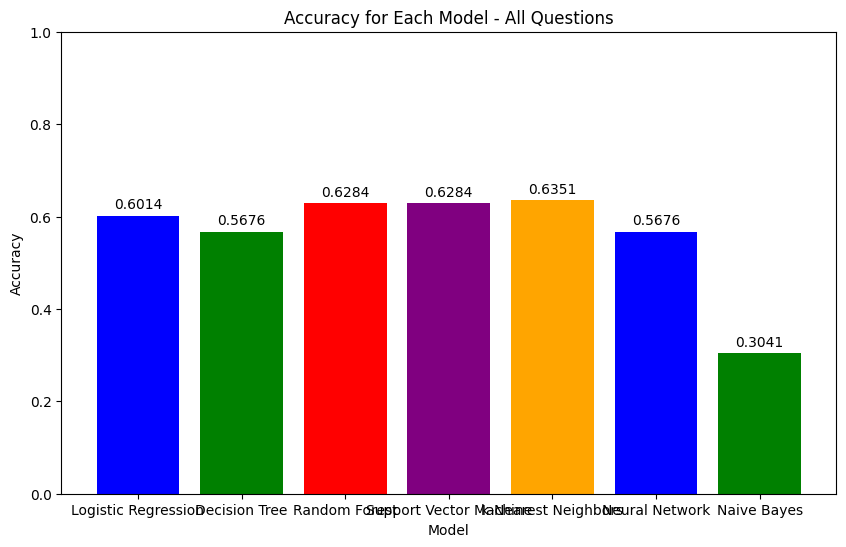

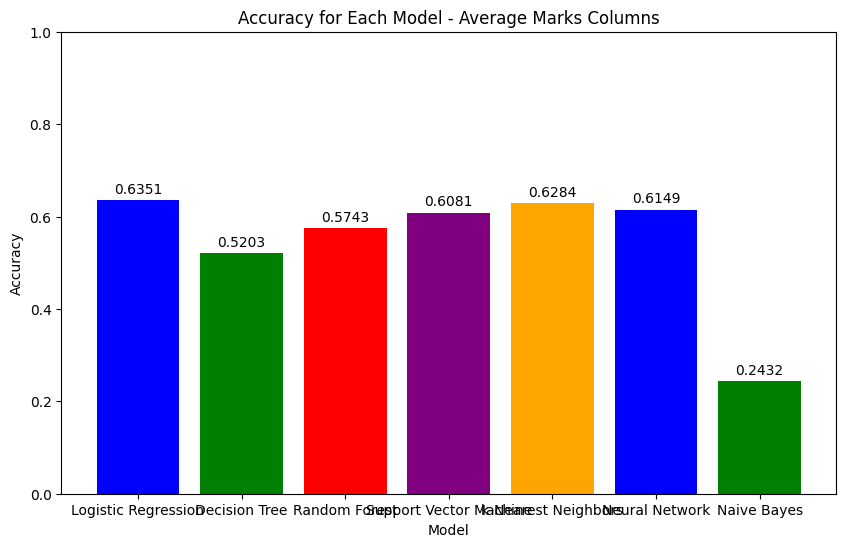

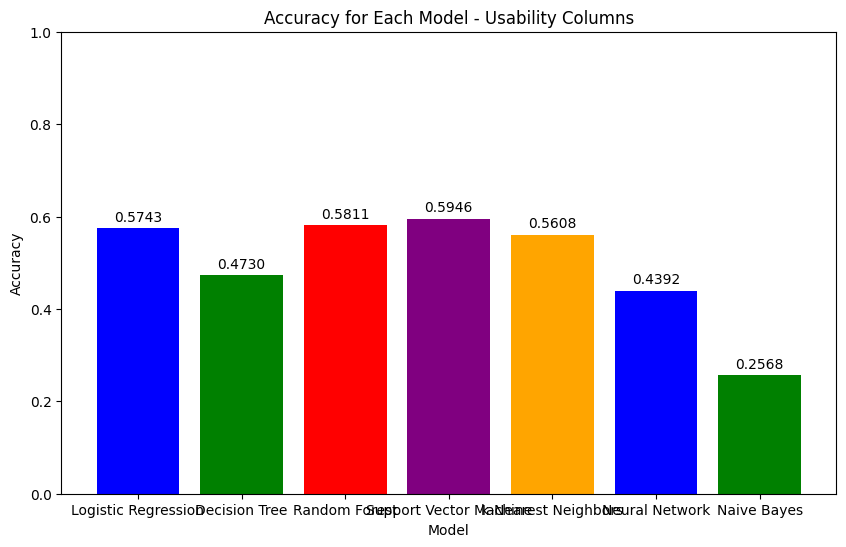

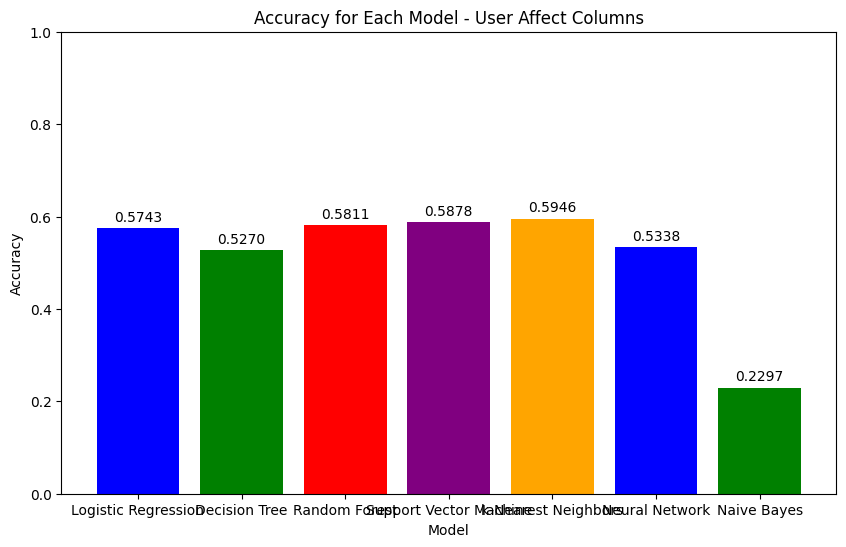

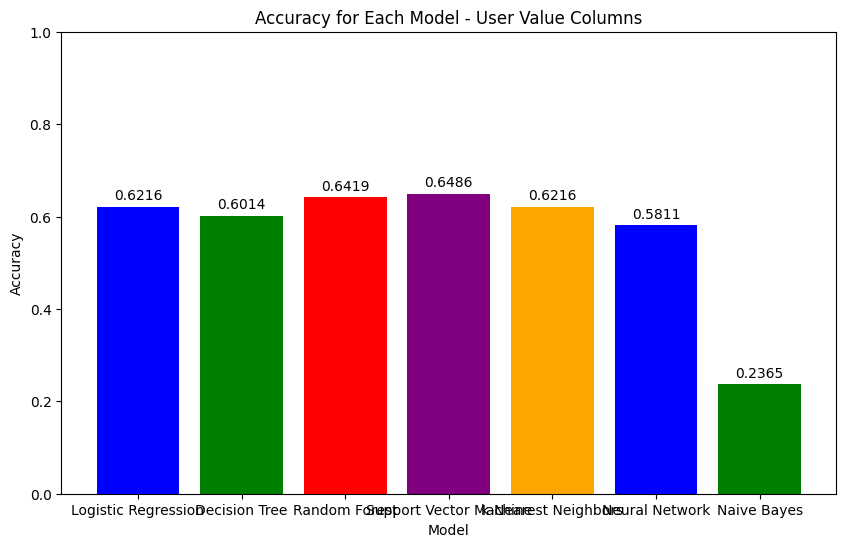

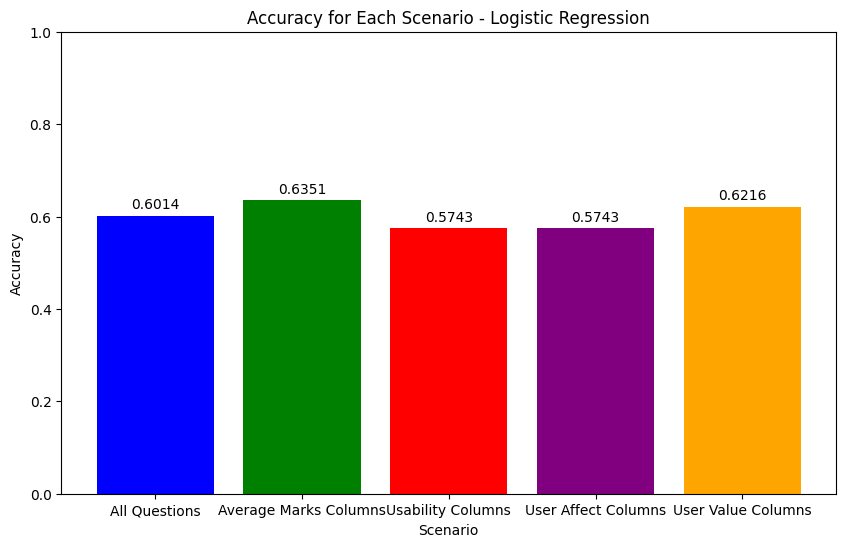

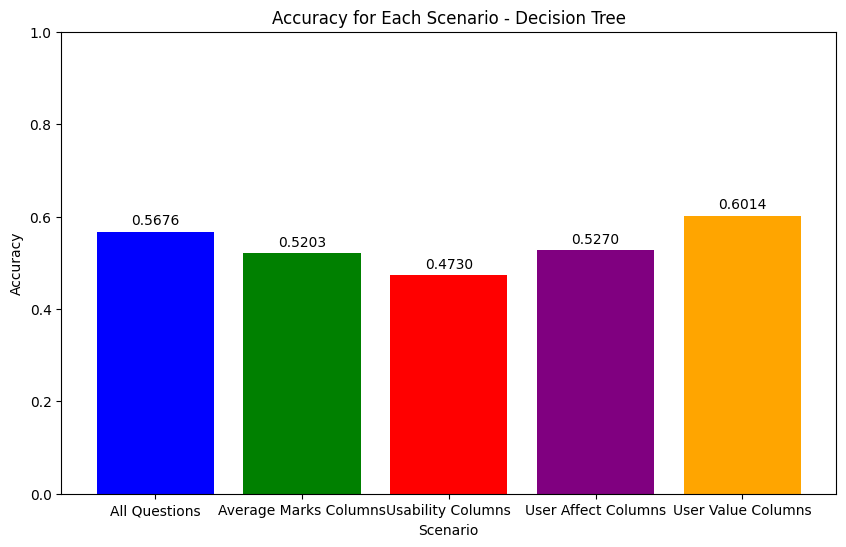

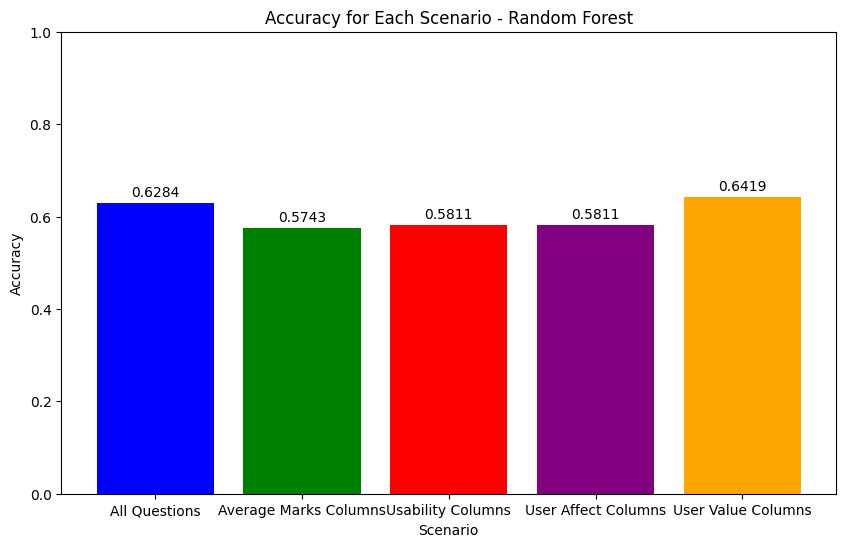

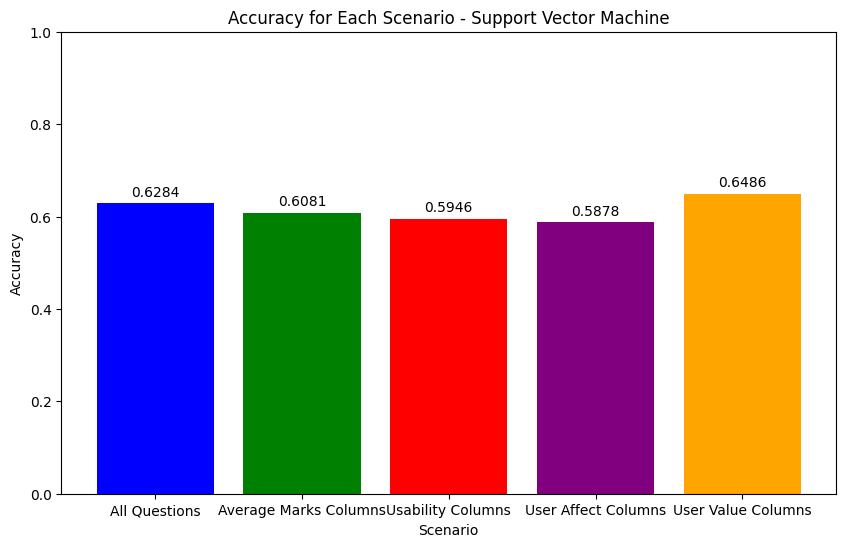

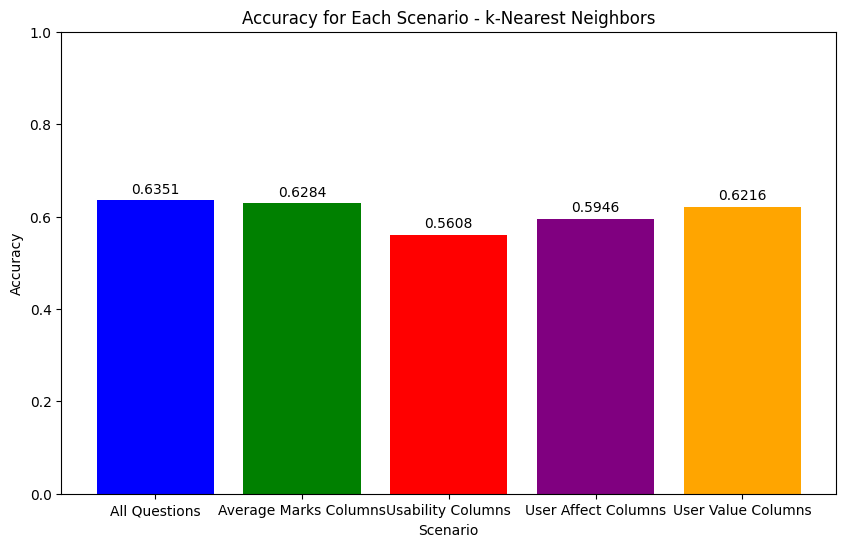

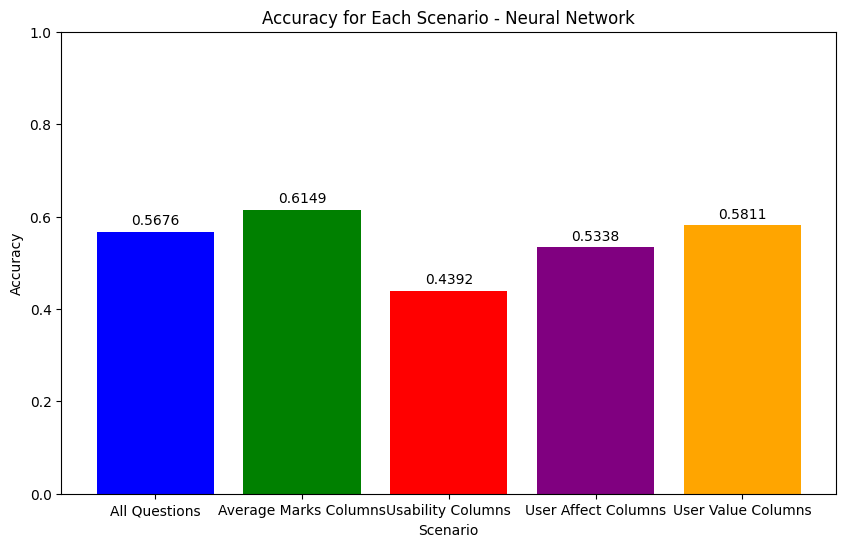

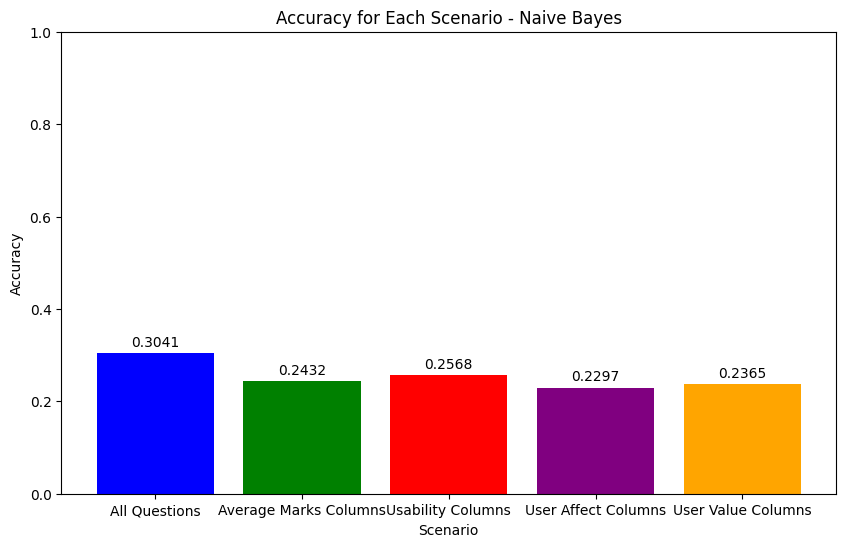

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define dictionaries to store accuracies for each scenario and each model
scenarios_accuracy = {}
models_accuracy = {model_name: [] for model_name in models}

# Function to add labels on top of the bars
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Function to evaluate models for a given scenario
def evaluate_scenario(features, scenario_name):
    accuracies = []

    # Identify columns with string values
    string_columns = features.select_dtypes(include=['object']).columns

    # Apply one-hot encoding to columns with string values
    transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), string_columns)], remainder='passthrough')
    features_encoded = transformer.fit_transform(features)

    # Split the data into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.3, random_state=42)

    # Evaluate models, considering sparse matrices
    for model_name, model in models.items():
        if isinstance(features_encoded, csr_matrix):
            accuracy = evaluate_model_scaling_sparse(model, features_train, features_test, labels_train, labels_test)
        else:
            accuracy = evaluate_model_scaling(model, features_train, features_test, labels_train, labels_test)
        accuracies.append(accuracy)
        models_accuracy[model_name].append(accuracy)

    scenarios_accuracy[scenario_name] = accuracies

    print(f"\nScenario: {scenario_name}")
    for model_name, accuracy in zip(models.keys(), accuracies):
        print(f"{model_name}: Accuracy - {accuracy:.4f}")

# Evaluate models for each scenario
evaluate_scenario(features_all_questions, "All Questions")
evaluate_scenario(features_average_marks, "Average Marks Columns")
evaluate_scenario(features_usability, "Usability Columns")
evaluate_scenario(features_user_affect, "User Affect Columns")
evaluate_scenario(features_user_value, "User Value Columns")

# Bar chart for each scenario
for scenario, accuracies in scenarios_accuracy.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title(f'Accuracy for Each Model - {scenario}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    add_labels(plt.gca(), bars)  # Add accuracy labels
    plt.show()

# Bar chart for each classification model
for model_name, accuracies in models_accuracy.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(scenarios_accuracy.keys(), accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title(f'Accuracy for Each Scenario - {model_name}')
    plt.xlabel('Scenario')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    add_labels(plt.gca(), bars)  # Add accuracy labels
    plt.show()


between usability, user affect and user value - user value is most significant - when developing mobile apps feature with limited resources, can focus on user value

limitation: only one set of questionnaire, if the question changed, results may change as well, but the programming codes can be apply to new set of dataset

from the accuracy results, out of 5 models 5 scenario,

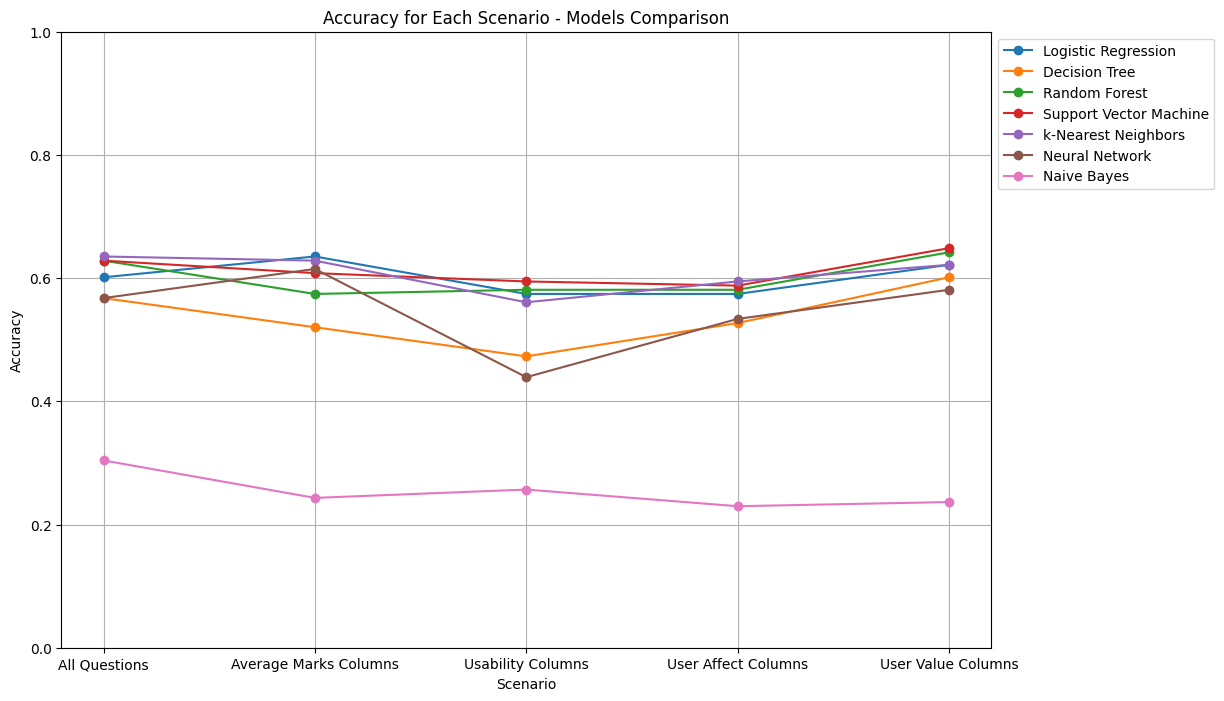

In [ ]:
# Line Plot for each model across scenarios
plt.figure(figsize=(12, 8))
for model_name, accuracies in models_accuracy.items():
    plt.plot(scenarios_accuracy.keys(), accuracies, marker='o', label=model_name)

plt.title('Accuracy for Each Scenario - Models Comparison')
plt.xlabel('Scenario')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


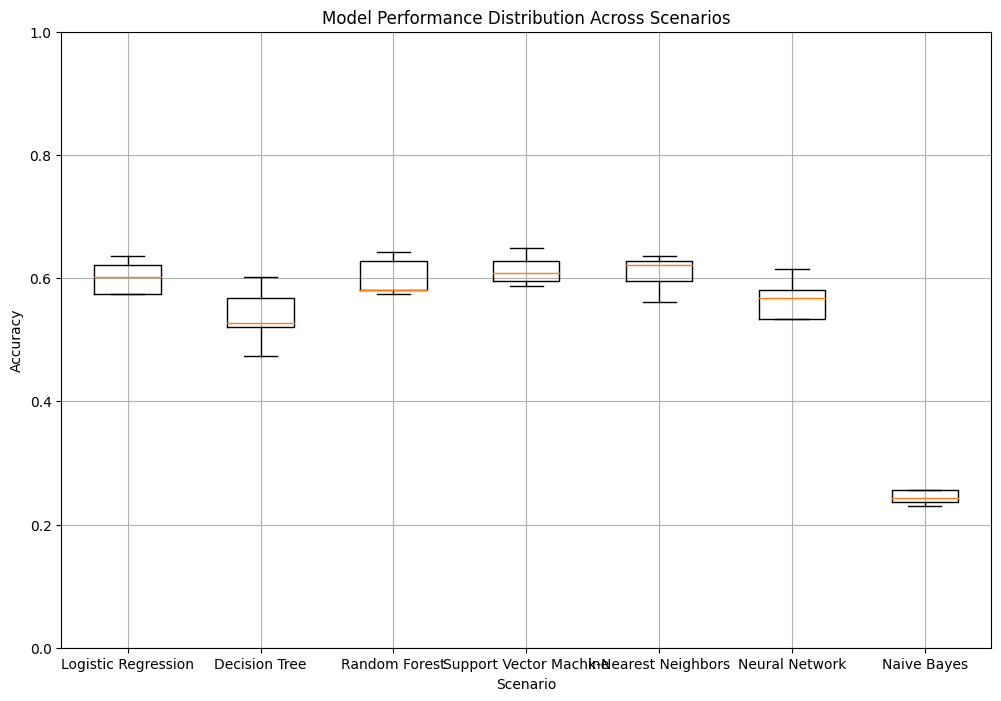

In [ ]:
# Box Plot for Model Performance Distribution Across Scenarios
plt.figure(figsize=(12, 8))

data_to_plot = [accuracies for _, accuracies in models_accuracy.items()]

plt.boxplot(data_to_plot, labels=list(models_accuracy.keys()), showfliers=False)
plt.title('Model Performance Distribution Across Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


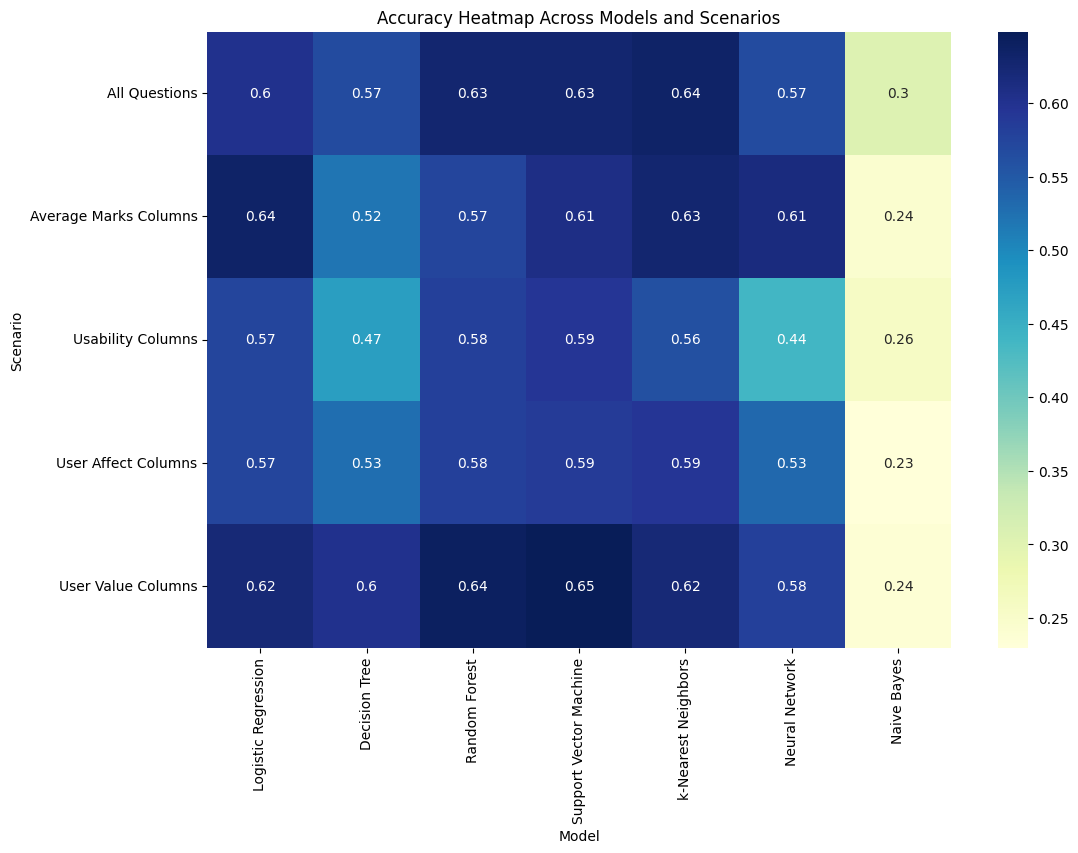

In [ ]:
import seaborn as sns

# Heatmap for accuracies across models and scenarios
plt.figure(figsize=(12, 8))
sns.heatmap(np.array([list(accuracies) for accuracies in scenarios_accuracy.values()]),
            annot=True, cmap='YlGnBu', xticklabels=models.keys(), yticklabels=scenarios_accuracy.keys())
plt.title('Accuracy Heatmap Across Models and Scenarios')
plt.xlabel('Model')
plt.ylabel('Scenario')
plt.show()


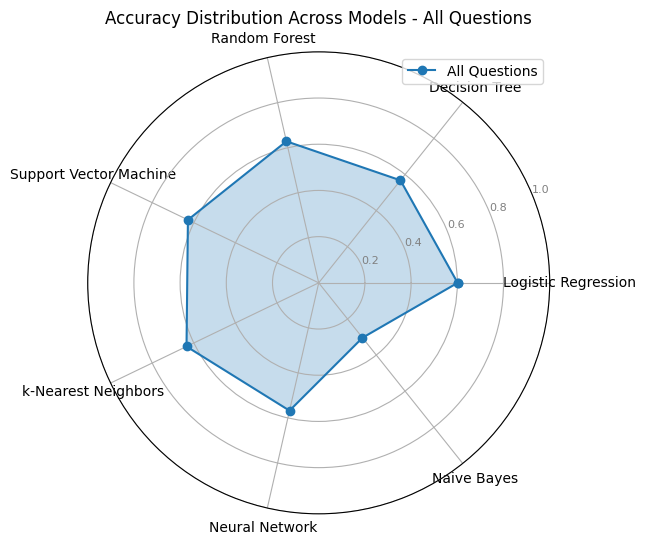

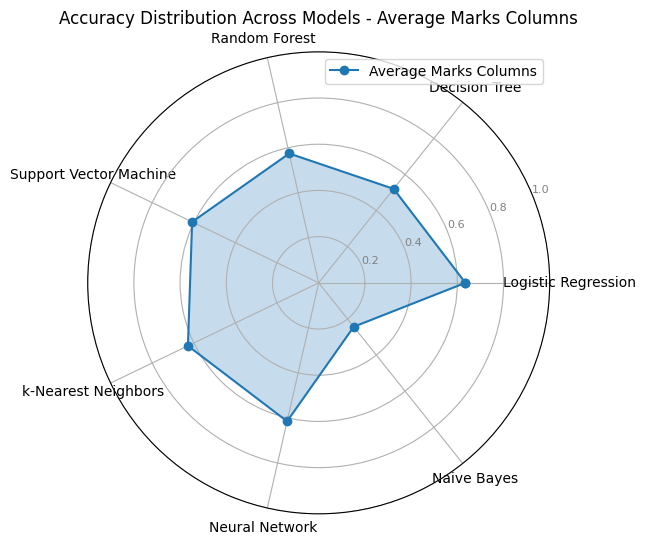

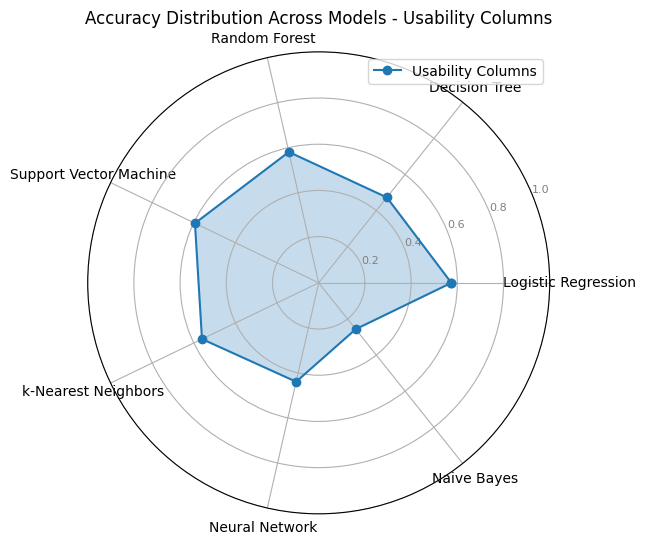

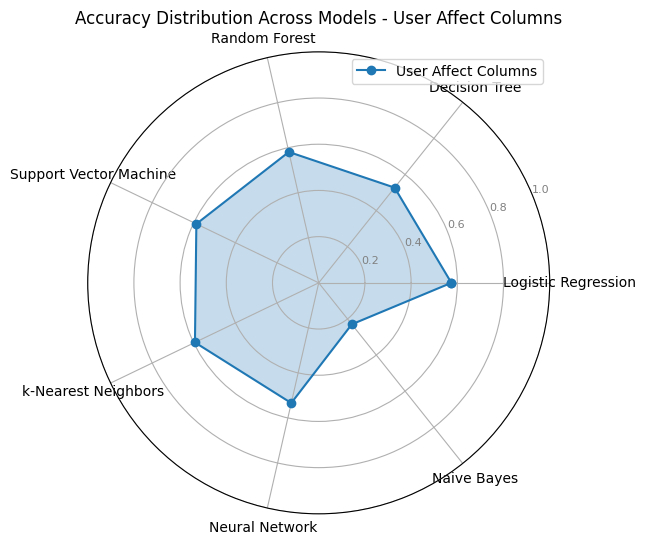

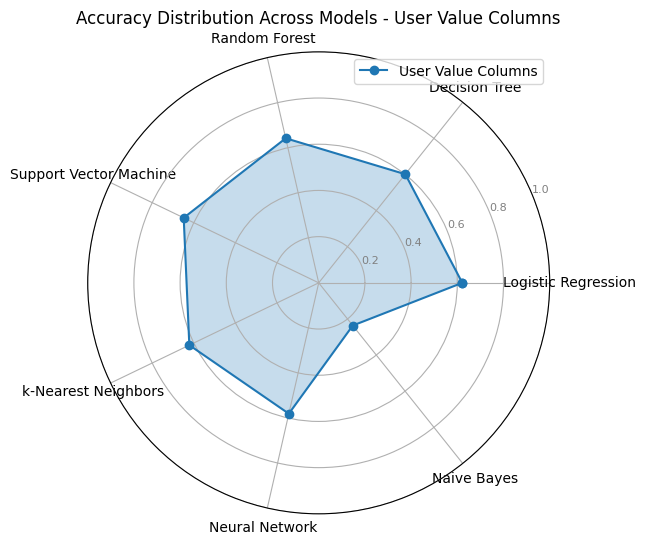

In [ ]:
from math import pi

# Spider chart for each scenario
for scenario, accuracies in scenarios_accuracy.items():
    plt.figure(figsize=(10, 6))
    categories = list(models.keys())
    values = accuracies
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]
    plt.polar(angles, values, marker='o', label=scenario)
    plt.fill(angles, values, alpha=0.25)
    plt.title(f'Accuracy Distribution Across Models - {scenario}')
    plt.xticks(angles[:-1], categories)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color='grey', size=8)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


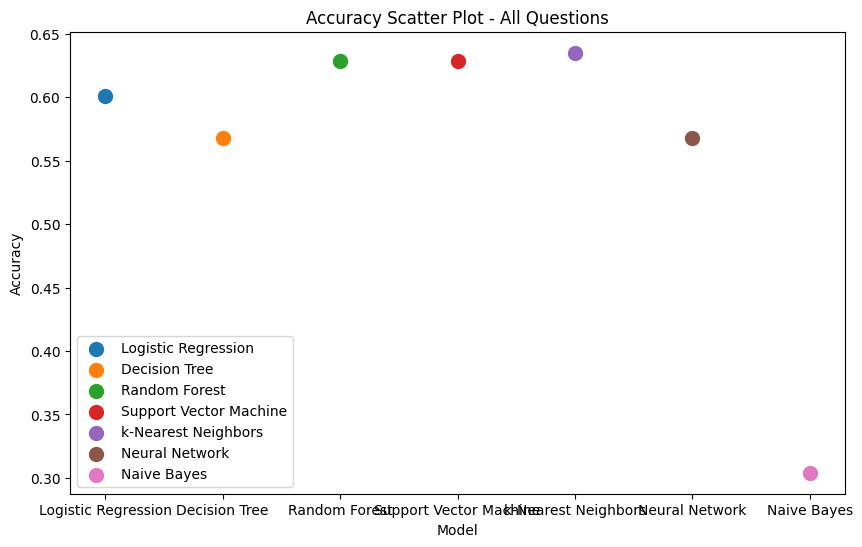

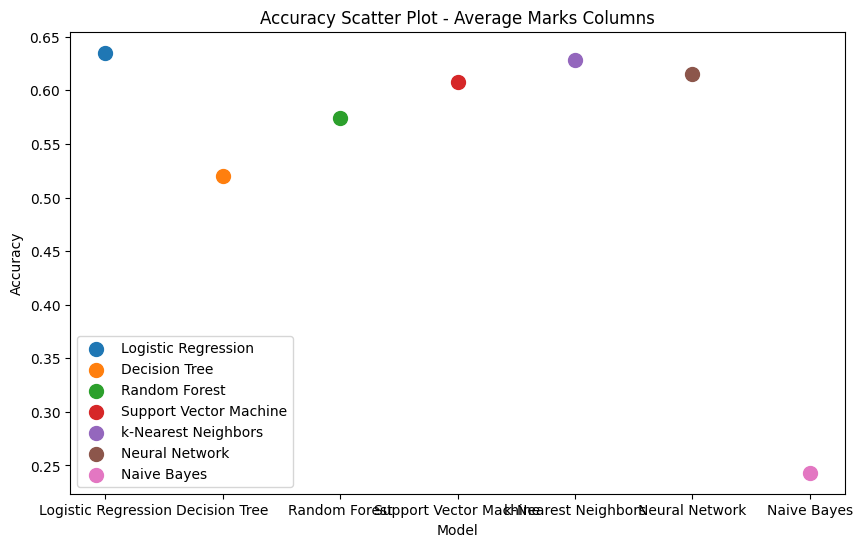

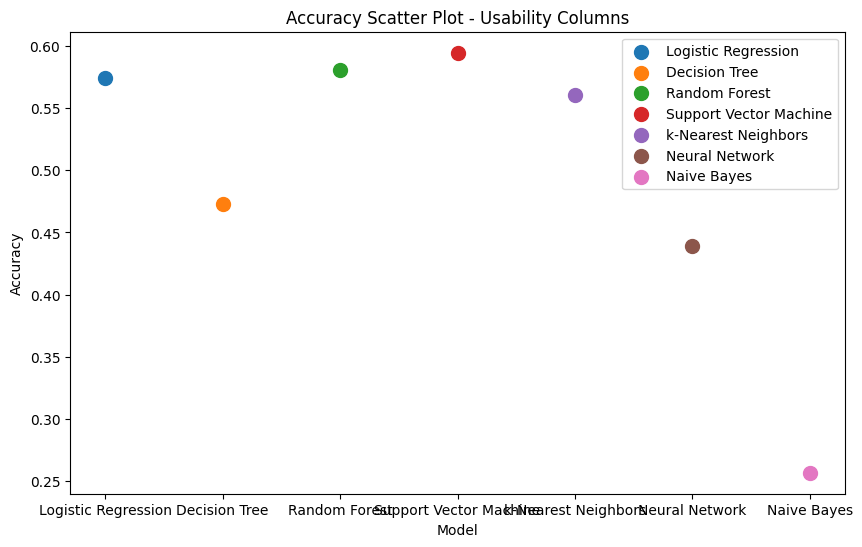

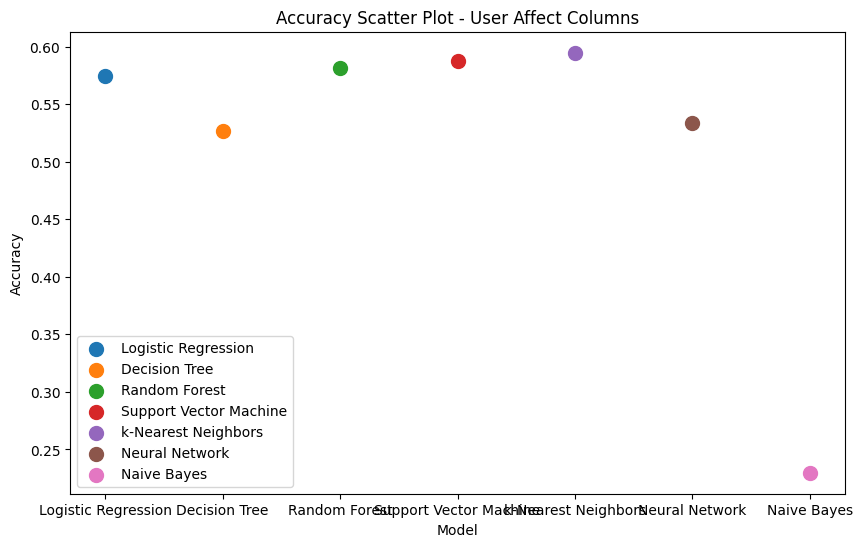

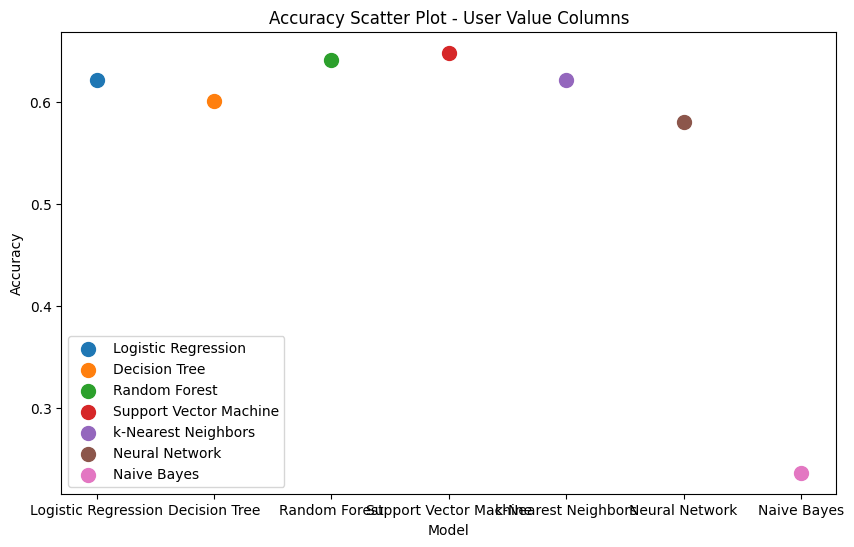

In [ ]:
# Scatter plot for accuracies across models and scenarios
for scenario, accuracies in scenarios_accuracy.items():
    plt.figure(figsize=(10, 6))
    for model_name, accuracy in zip(models.keys(), accuracies):
        plt.scatter(model_name, accuracy, label=model_name, s=100)
    plt.title(f'Accuracy Scatter Plot - {scenario}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


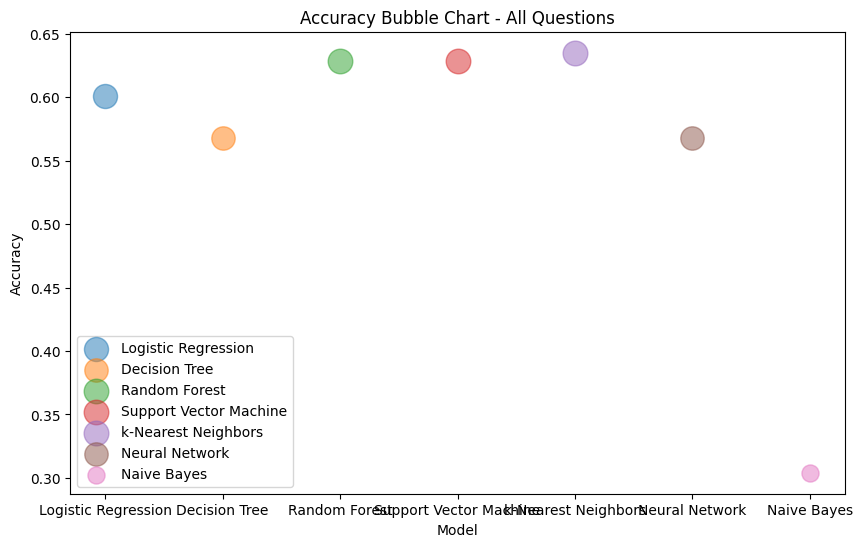

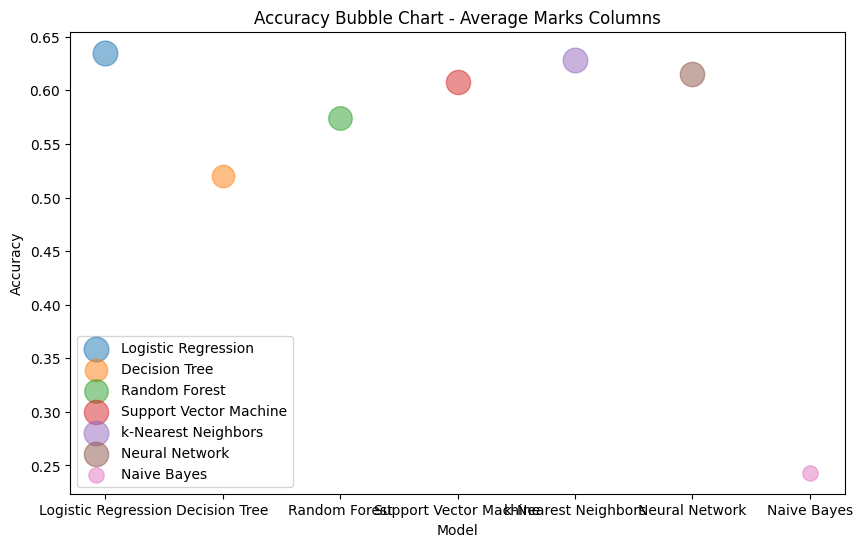

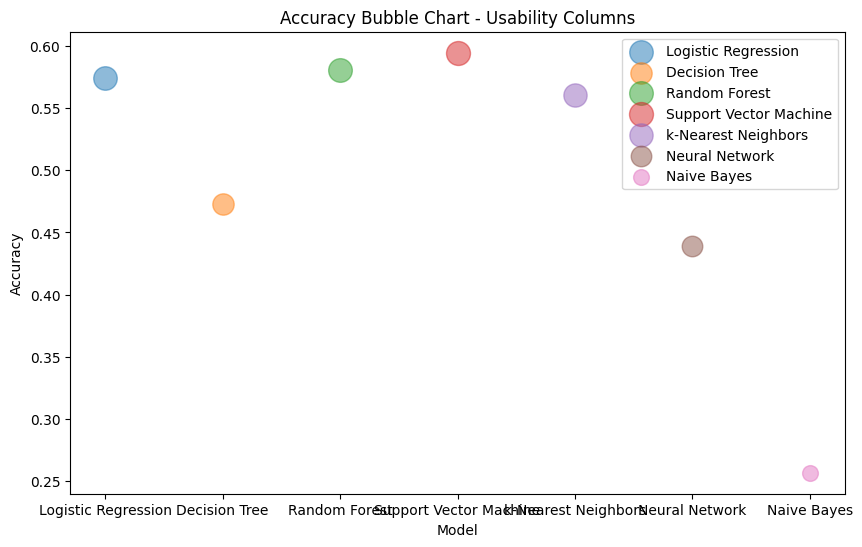

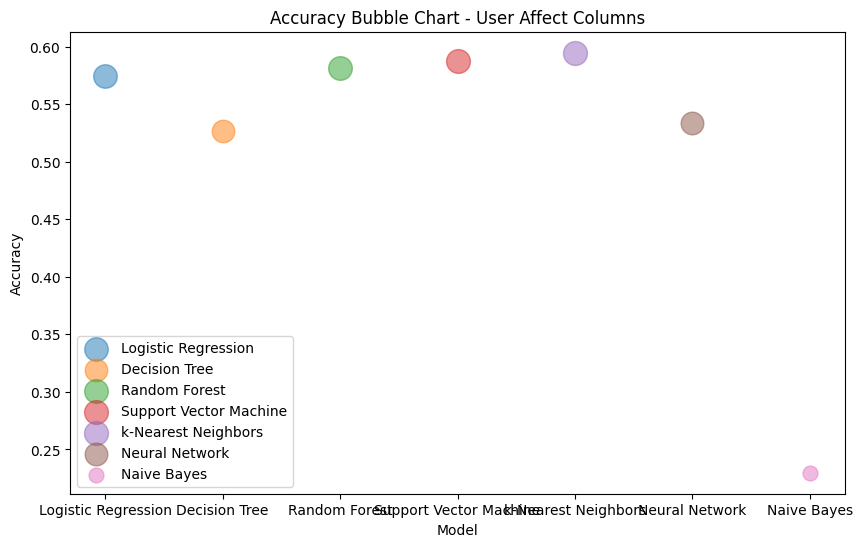

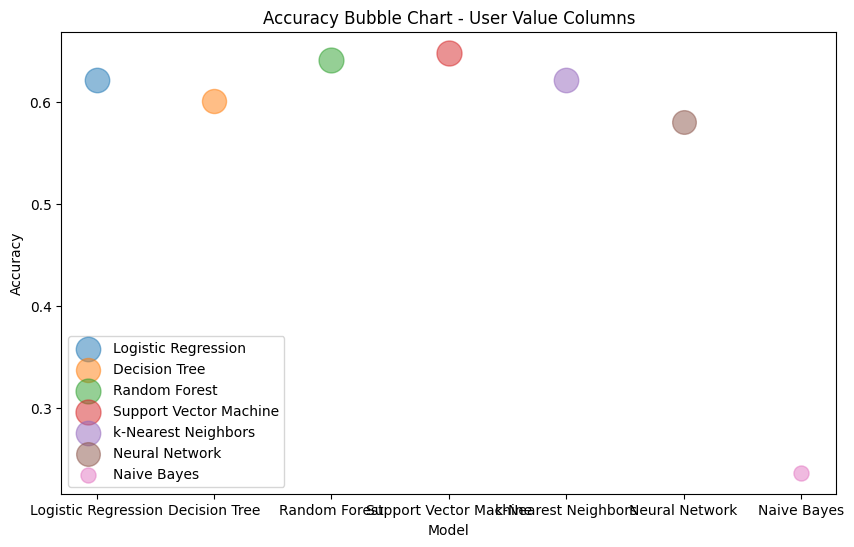

In [ ]:
# Bubble chart for accuracies across models and scenarios
for scenario, accuracies in scenarios_accuracy.items():
    plt.figure(figsize=(10, 6))
    for model_name, accuracy in zip(models.keys(), accuracies):
        plt.scatter(model_name, accuracy, s=accuracy * 500, alpha=0.5, label=model_name)
    plt.title(f'Accuracy Bubble Chart - {scenario}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


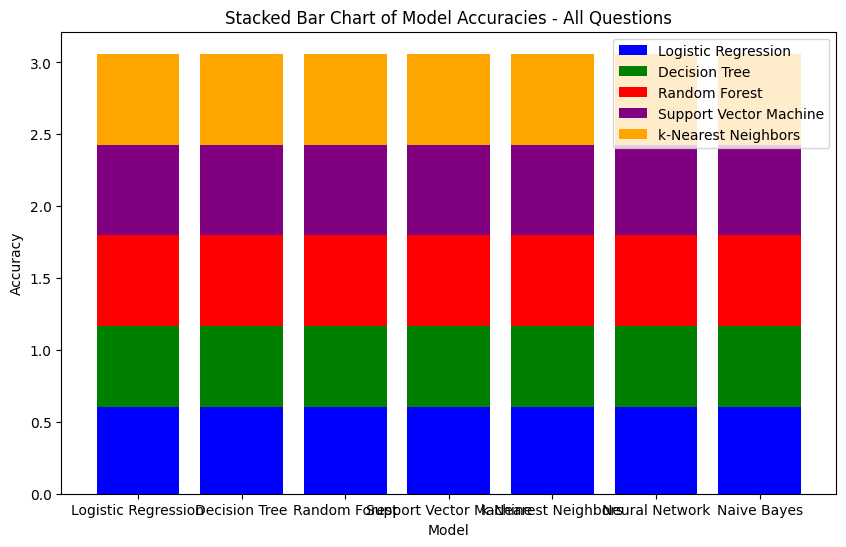

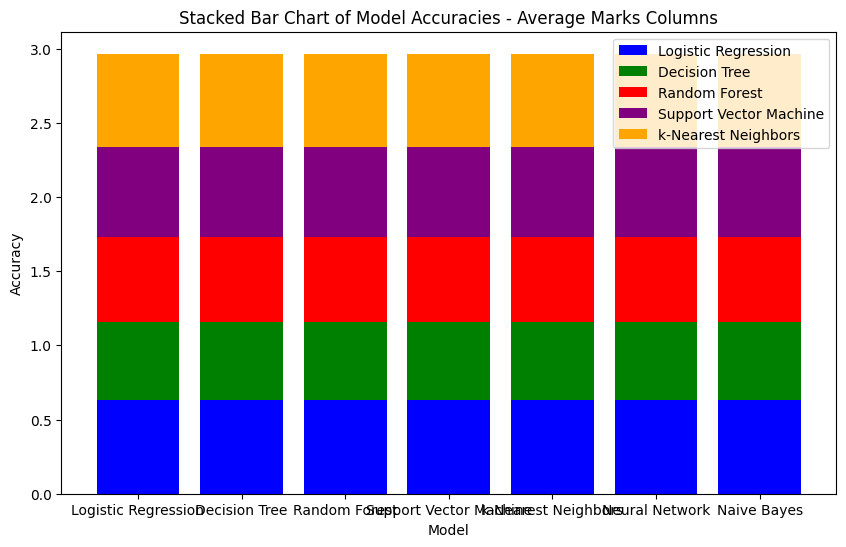

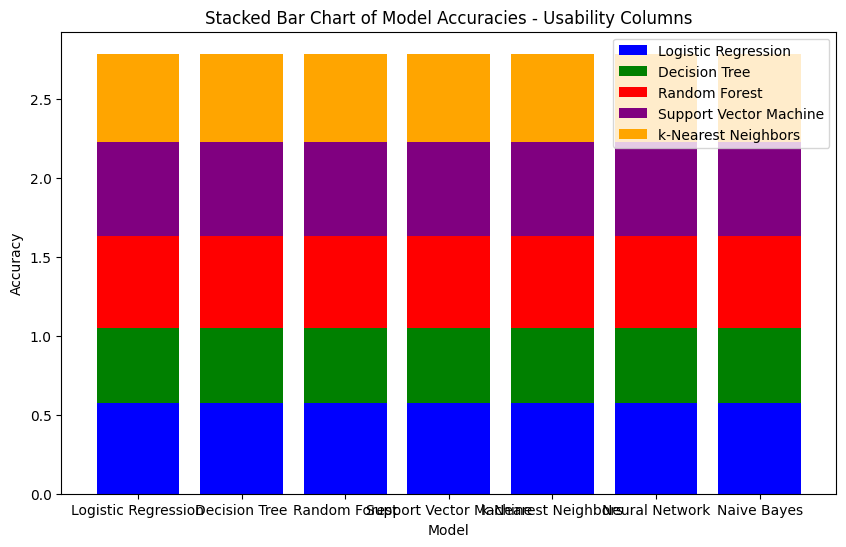

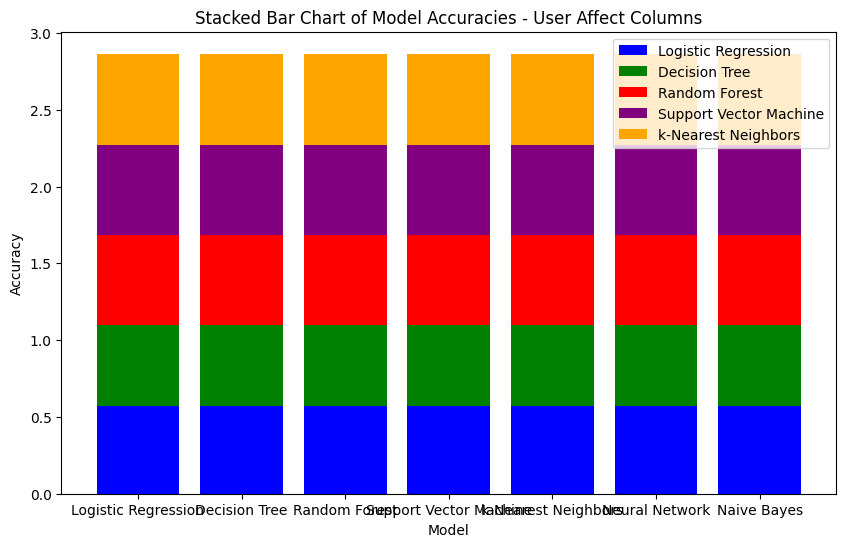

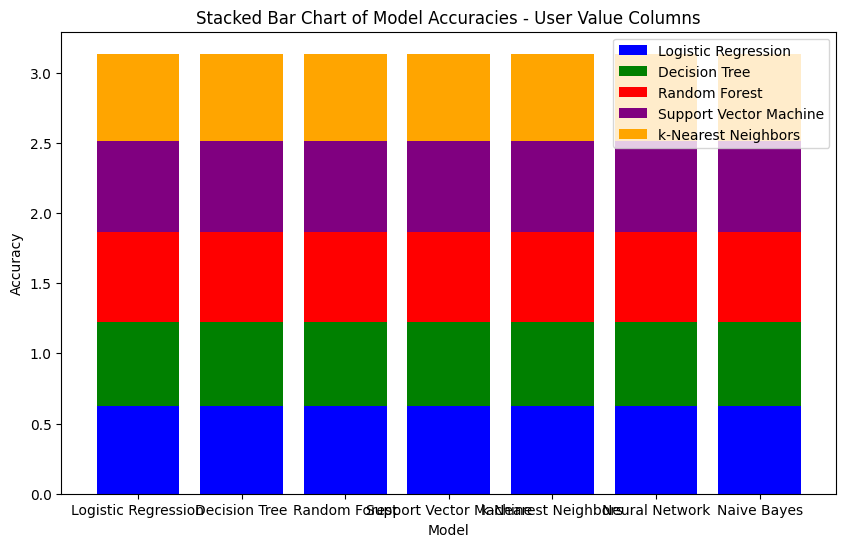

In [ ]:
# Stacked bar chart for accuracies across models within a scenario
for scenario, accuracies in scenarios_accuracy.items():
    plt.figure(figsize=(10, 6))
    plt.bar(models.keys(), accuracies[0], label='Logistic Regression', color='blue')
    plt.bar(models.keys(), accuracies[1], bottom=accuracies[0], label='Decision Tree', color='green')
    plt.bar(models.keys(), accuracies[2], bottom=np.array(accuracies[0]) + np.array(accuracies[1]),
            label='Random Forest', color='red')
    plt.bar(models.keys(), accuracies[3], bottom=np.array(accuracies[0]) + np.array(accuracies[1]) + np.array(accuracies[2]),
            label='Support Vector Machine', color='purple')
    plt.bar(models.keys(), accuracies[4], bottom=np.array(accuracies[0]) + np.array(accuracies[1]) + np.array(accuracies[2]) +
            np.array(accuracies[3]), label='k-Nearest Neighbors', color='orange')
    plt.title(f'Stacked Bar Chart of Model Accuracies - {scenario}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
